# HOUSE PRICE PREDICTION
<hr>


# Objectives and Steps of prediction
<hr>

This is to forecast house prices  <br>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The analysis will be following in the steps below (this is initial idea, will be changed later on)  

<br><br>



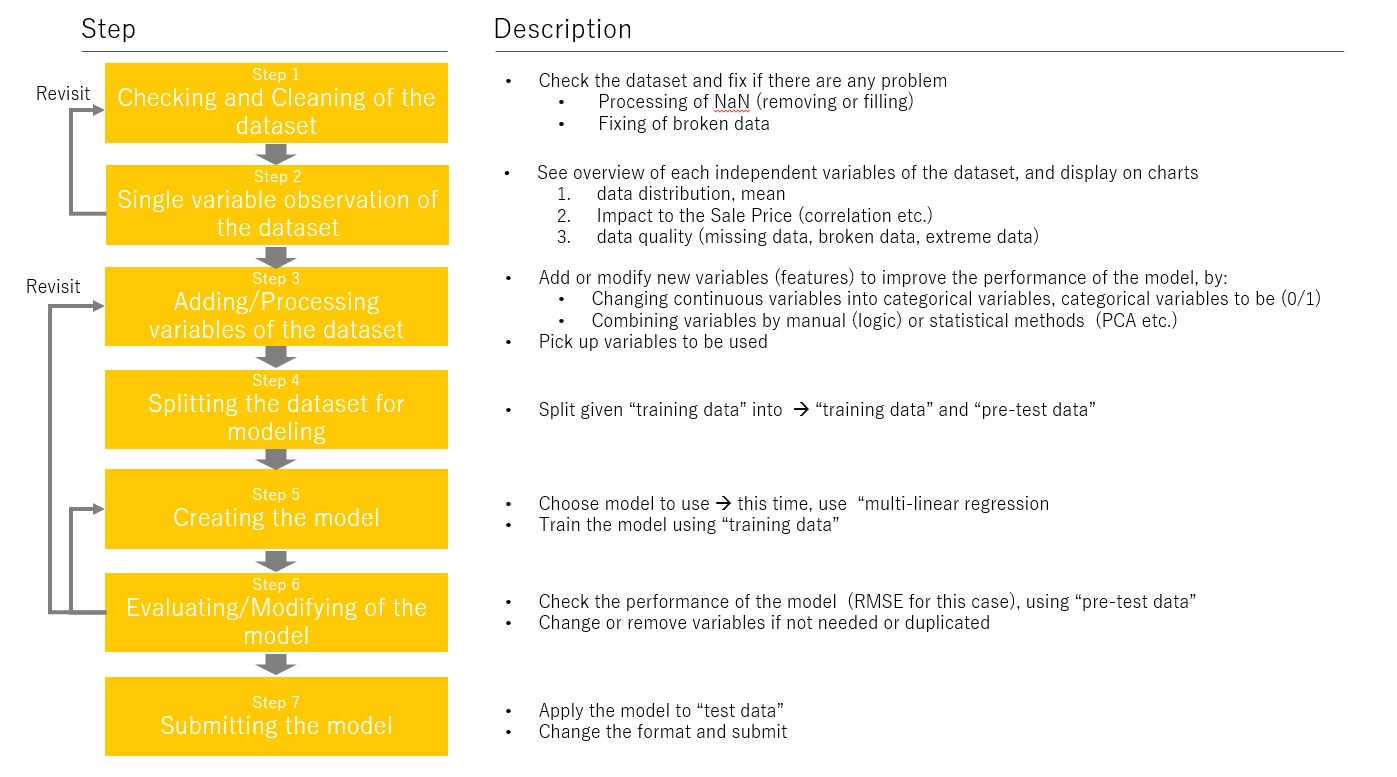

In [2]:
from IPython.display import Image
Image(filename= 'Steps_of_prediction1106.jpg')

<br><br><br><br>
# Step 1 :  Checking and Clearning of the dataset
<hr>

Here, import the training data and check if there is any missing data. 
If needed, clean them (ex. fill NaN) 

<br><br><br>
### Import training data
<hr>

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train_df = pd.read_csv('../data/train.csv')  # Used for training and pre-testing
test_df  = pd.read_csv('../data/test.csv')  # Used later when submitting

<br><br><br>
### Check the data
<hr>

In [7]:
train_df.shape

(1460, 81)

seeing above, there are 81 data, including 1 data to be predicted ('SalePrice') 

Number of sample is 1460

The key parameters of the predicted dependent value ('SalePrice') is as below:

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<br><br><br>
### Clean the data
<hr>

The data set are combination of number and non-number data. (object, that is actually string) 

Some variables are missing and not available for all samples, and many NaN data for non-number (object) variables. 
Since NaN may have important meaning, here, replace NaN into string "n.a" so that they can be shown in the charts. 

This is done only for non-number variables. 
As for numbre variabes (int, float), keep NaN as it is, since the missing values are limited and not sure which number to use for replacement (0? average?). 

In [10]:
for column_name in train_df:
    dt = train_df[column_name].dtypes
    if dt == 'object':
        train_df[[column_name]] = train_df[[column_name]].fillna(value='n.a')

for column_name in test_df:
    dt = test_df[column_name].dtypes
    if dt == 'object':
        test_df[[column_name]] = test_df[[column_name]].fillna(value='n.a')



In [11]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,n.a,Reg,Lvl,AllPub,...,0,n.a,n.a,n.a,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,n.a,Reg,Lvl,AllPub,...,0,n.a,n.a,n.a,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,n.a,IR1,Lvl,AllPub,...,0,n.a,n.a,n.a,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,n.a,IR1,Lvl,AllPub,...,0,n.a,n.a,n.a,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,n.a,IR1,Lvl,AllPub,...,0,n.a,n.a,n.a,0,12,2008,WD,Normal,250000


Data of non-number varialbes are filled. 

In [12]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,n.a,Reg,Lvl,AllPub,...,120,0,n.a,MnPrv,n.a,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,n.a,IR1,Lvl,AllPub,...,0,0,n.a,n.a,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,n.a,IR1,Lvl,AllPub,...,0,0,n.a,MnPrv,n.a,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,n.a,IR1,Lvl,AllPub,...,0,0,n.a,n.a,n.a,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,n.a,IR1,HLS,AllPub,...,144,0,n.a,n.a,n.a,0,1,2010,WD,Normal




<br><Br><br>

# Step 2: Single variable observation of the dataset
<hr>

### Observation of target (dependent) variable - 'SalePrice'
<hr>

first, see the data quality and distribution of 'SalePrice' that is the data to be estimated.

In [13]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

It seems the data quality is good for SalePrice.

No missing data, no zero data, or no extremely high data

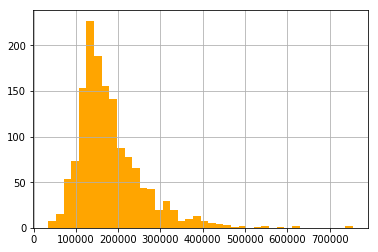

In [14]:
train_df['SalePrice'].hist(bins=40, color='orange')

seeing this, the distribution is like log-normal distribution. 

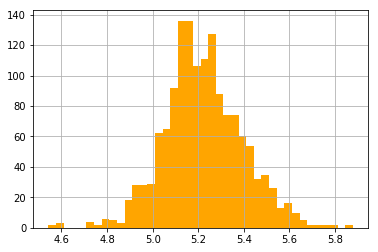

In [15]:
np.log10(train_df['SalePrice']).hist(bins=40, color='orange')

Log of the data is similar to normal distribution. ==> Therefore use log10(SalePrice) as the target variable. 

It seems there are two peaks.

<br><br><br>
### Observation of independent variables
<hr>

Then, see each variables potentially can be used for estimation. First charting the variables one by one, and then see by collective ways<br><br>

In the following, show all the variables. Numeric variables and non-numeric variables (categorical variables) will use different format.

<br><br>
#### a) Charting by each single data
<hr>

Here, see each independent variable by showing charts. 


For each independent variable, show 2 chart - left one is distribution of number of samples,  right one is relationship between the independent variable and SalePrice.

d:\y-data\venv\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
d:\y-data\venv\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
d:\y-data\venv\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
d:\y-data\venv\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
d:\y-data\venv\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcPara

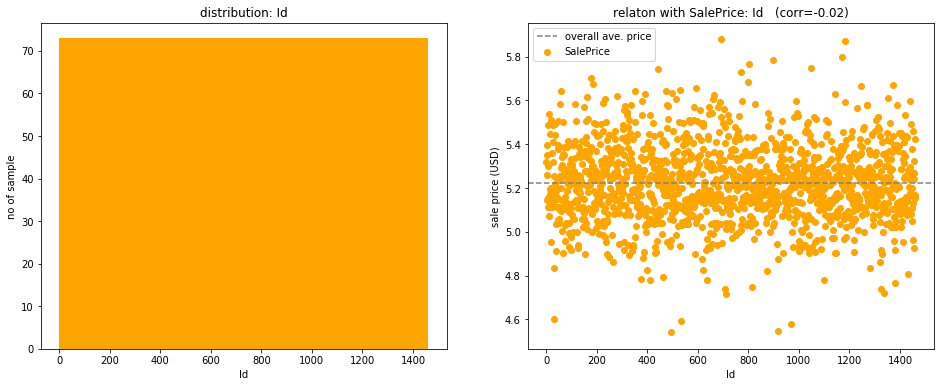

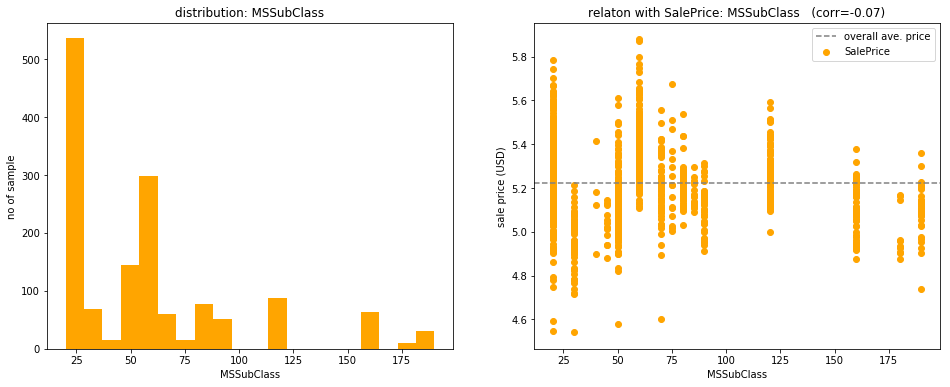

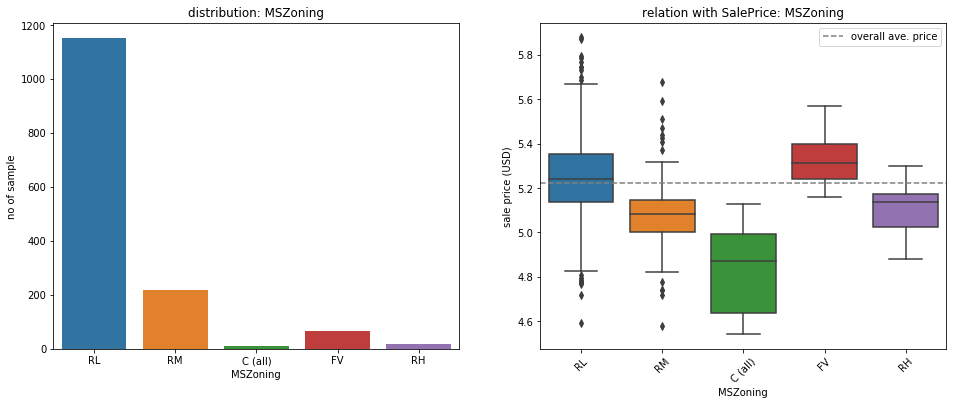

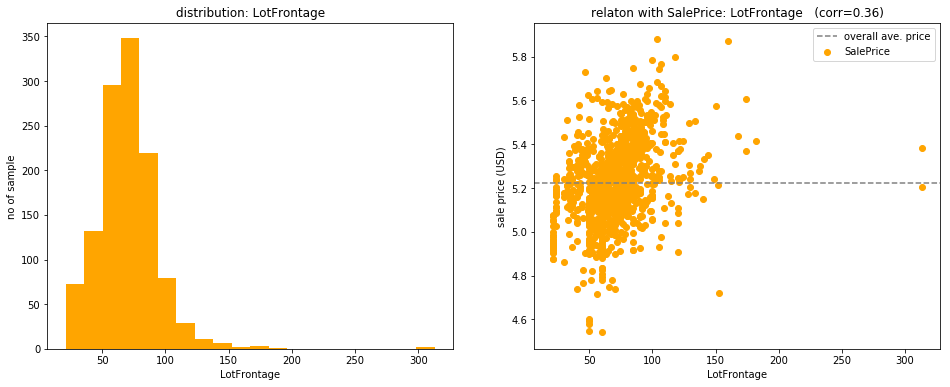

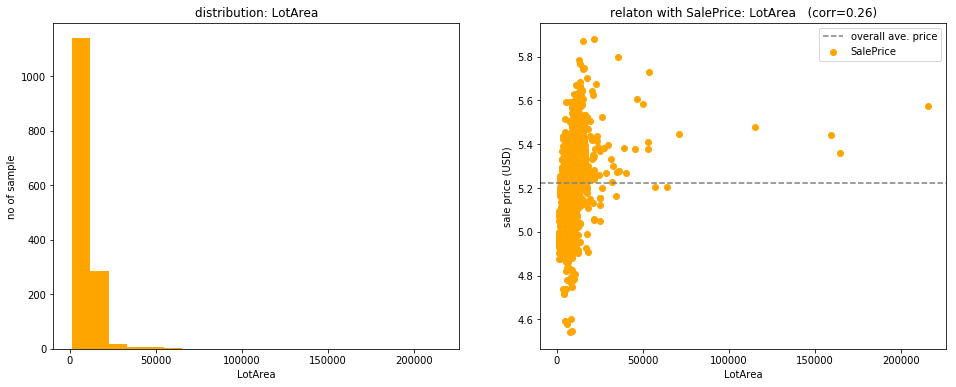

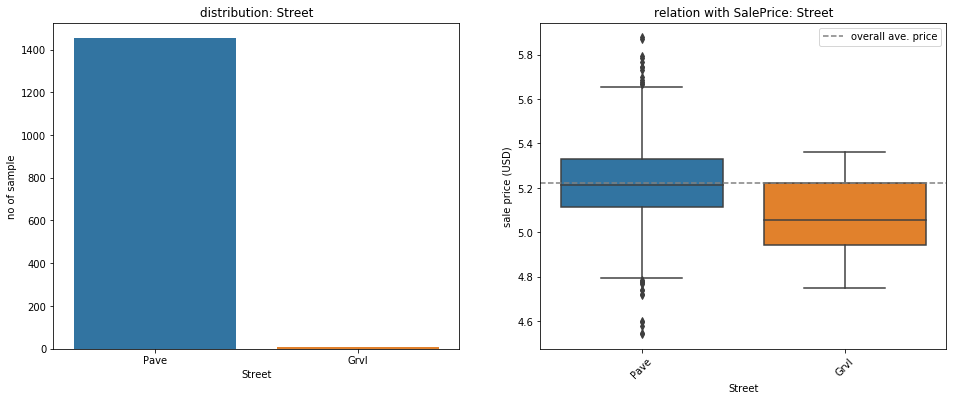

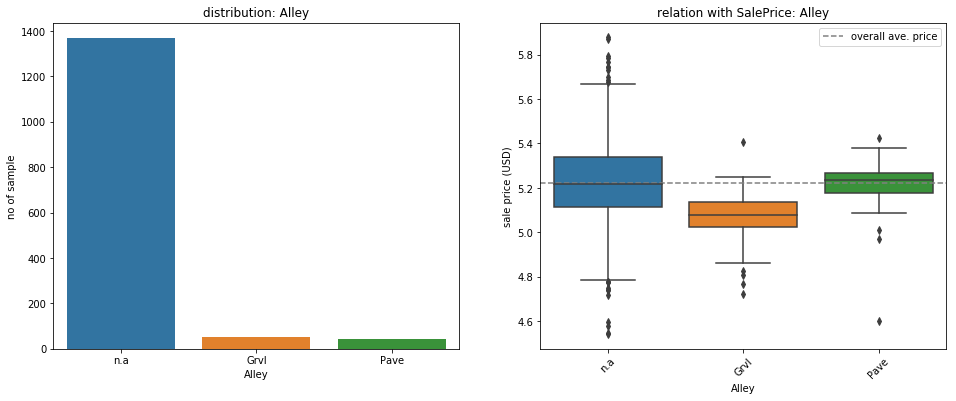

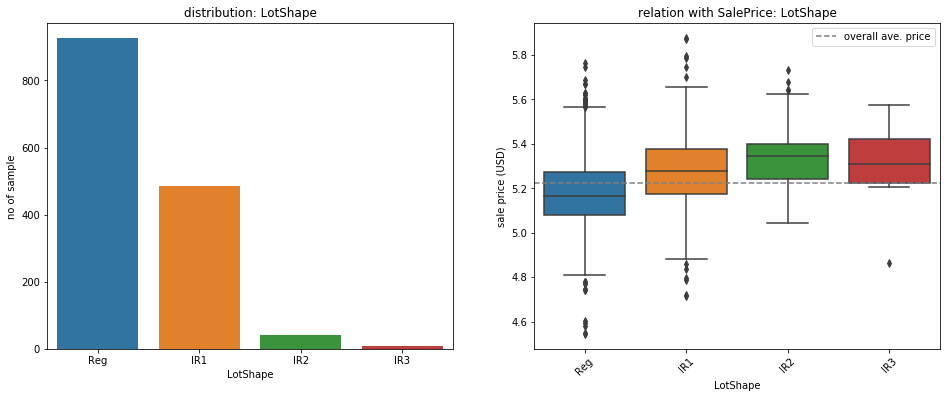

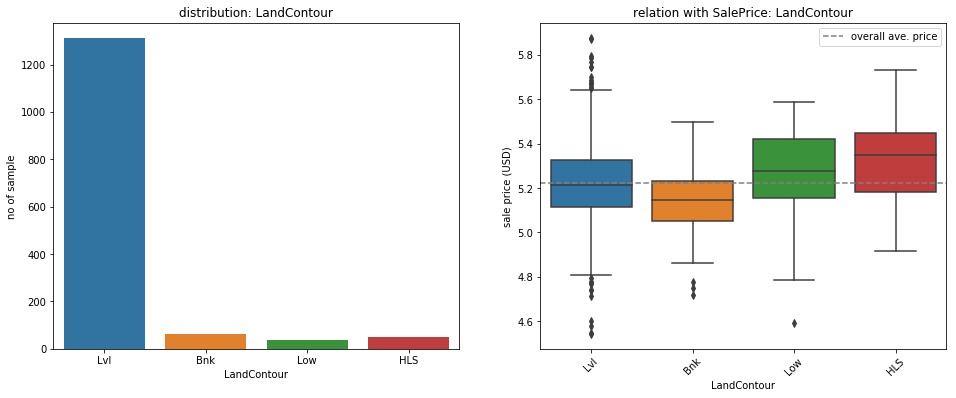

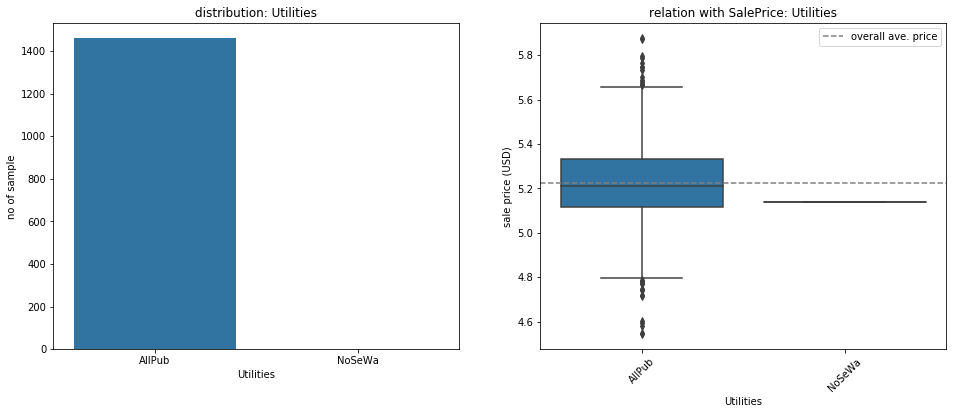

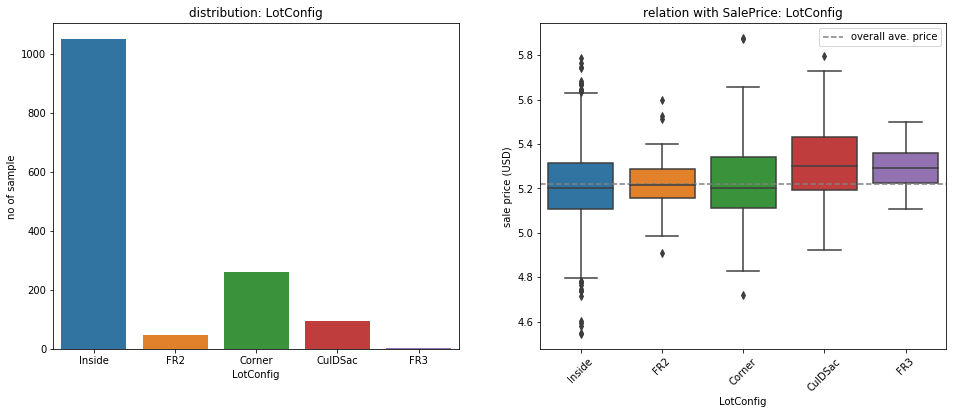

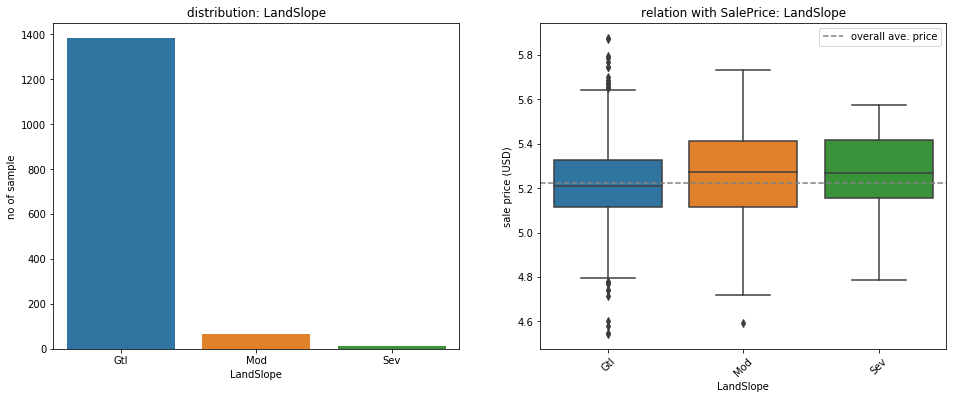

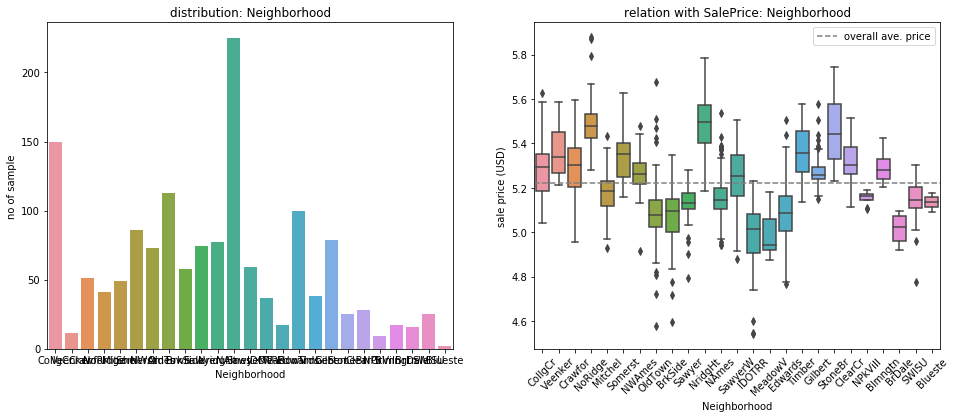

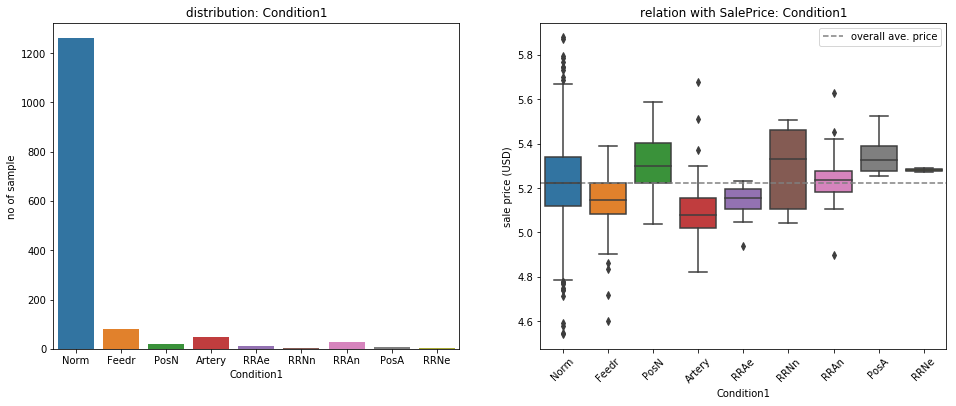

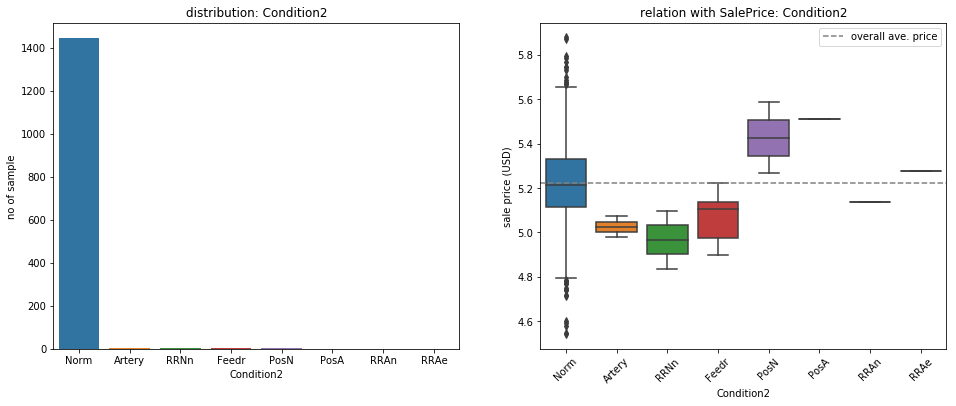

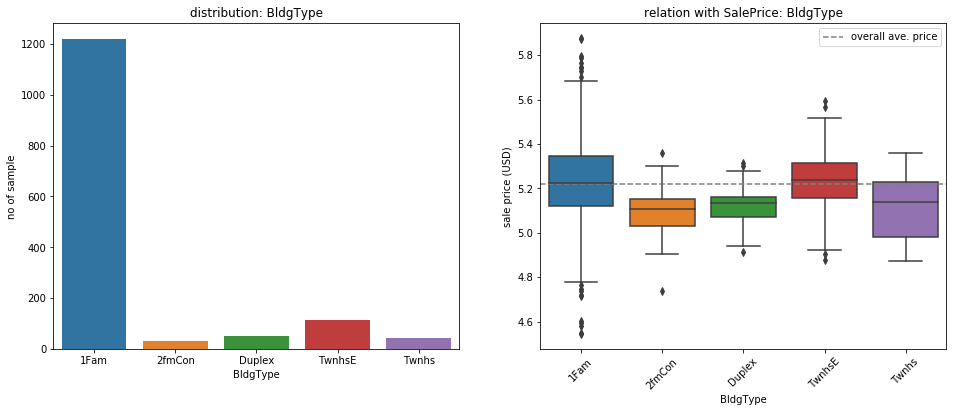

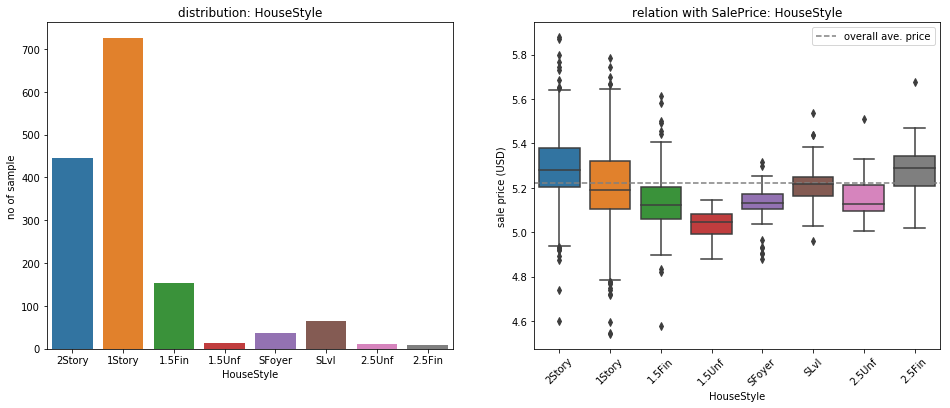

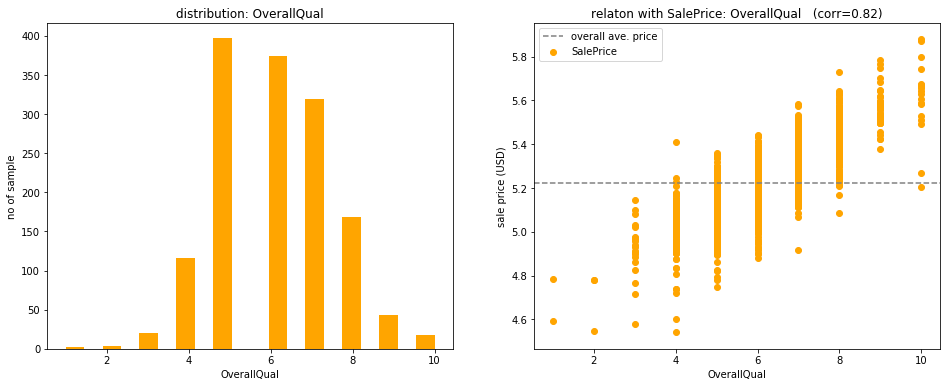

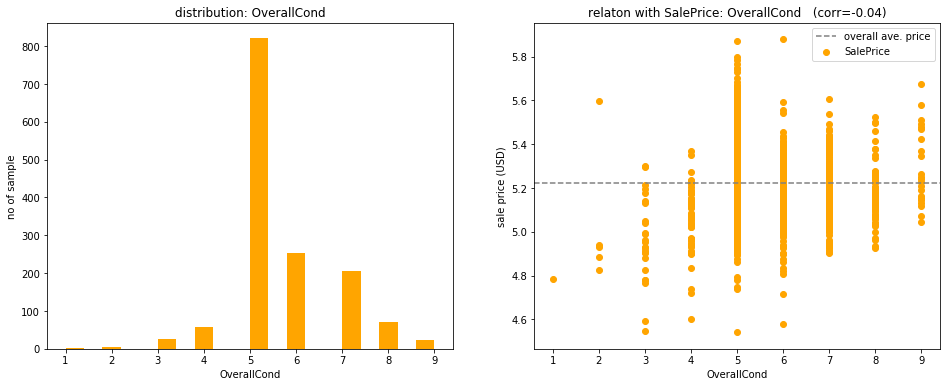

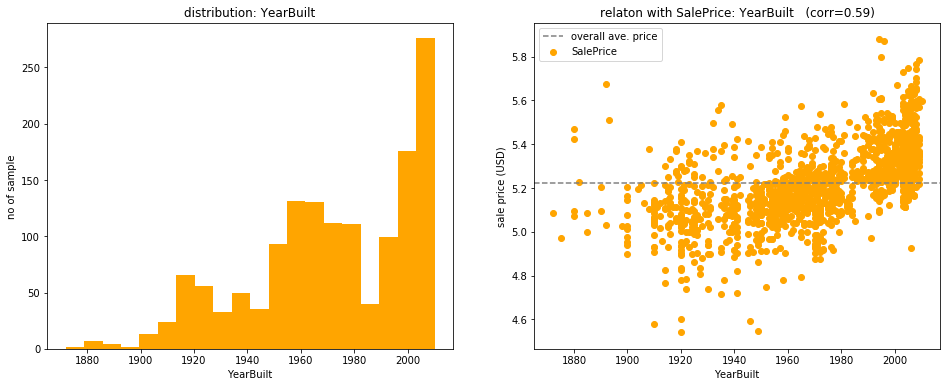

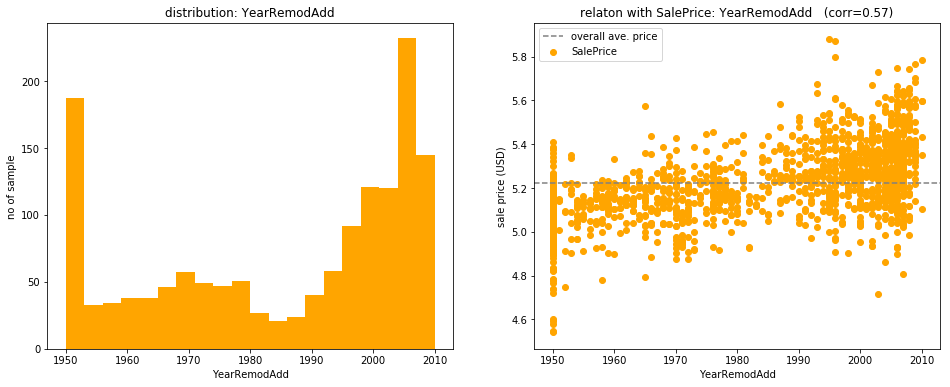

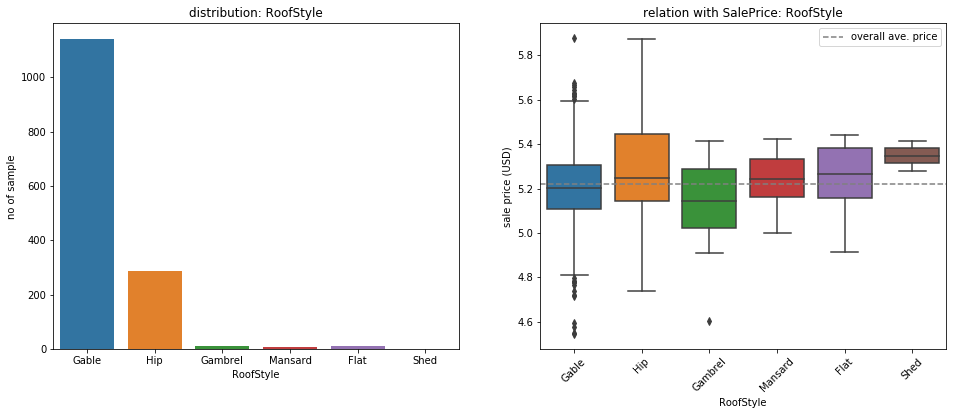

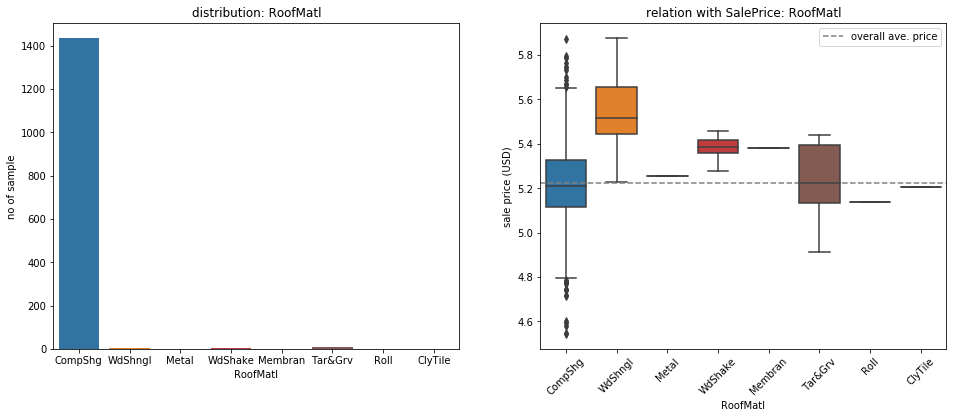

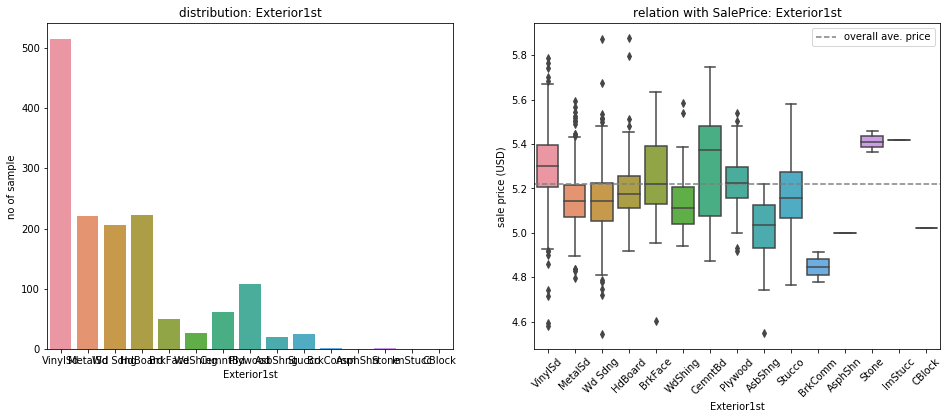

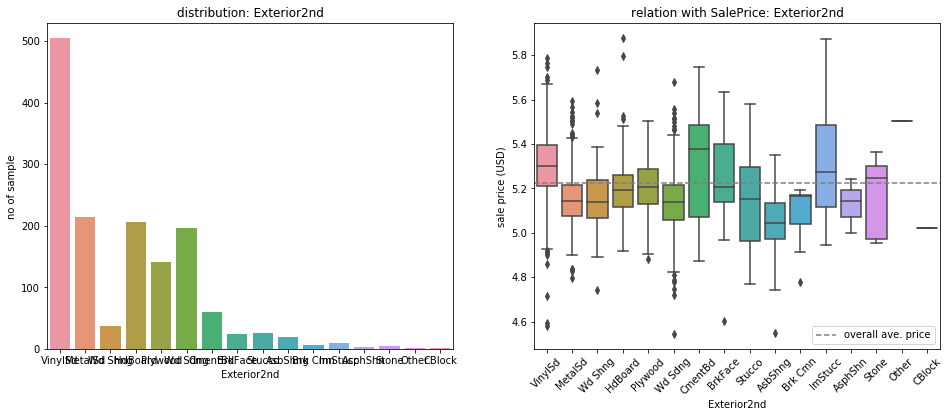

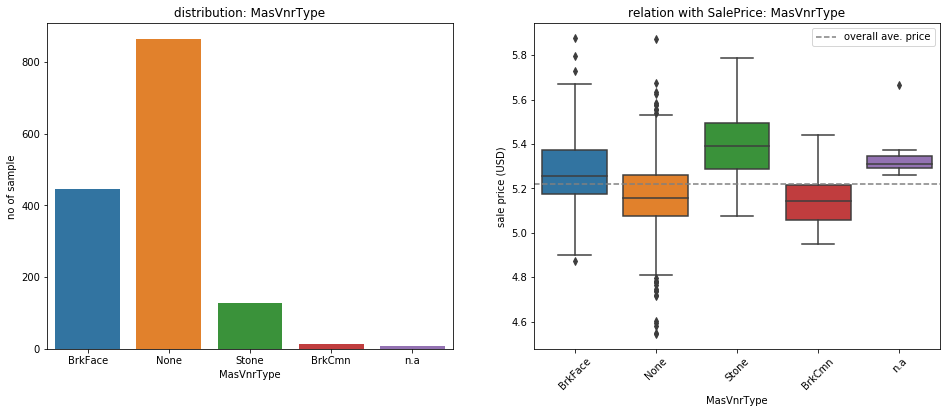

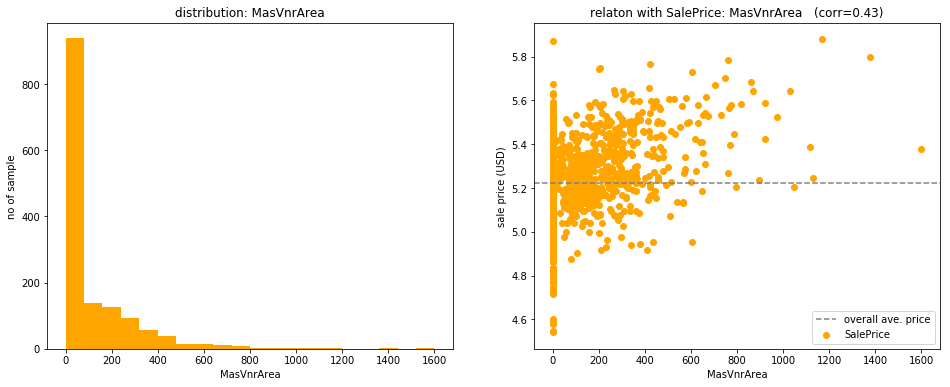

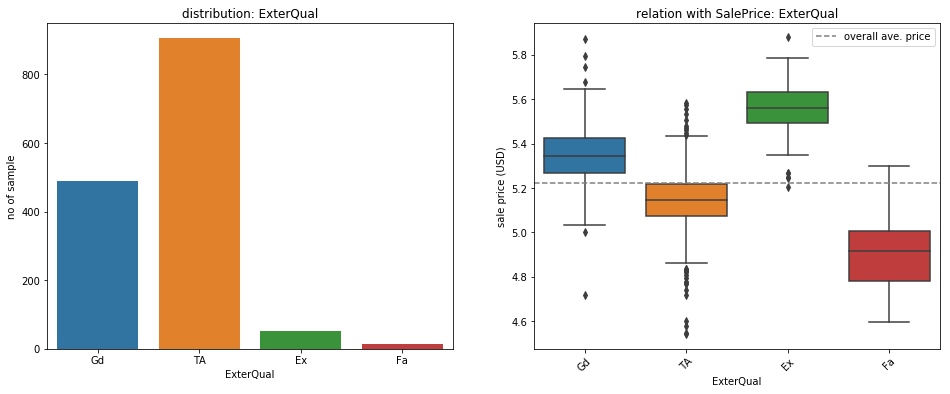

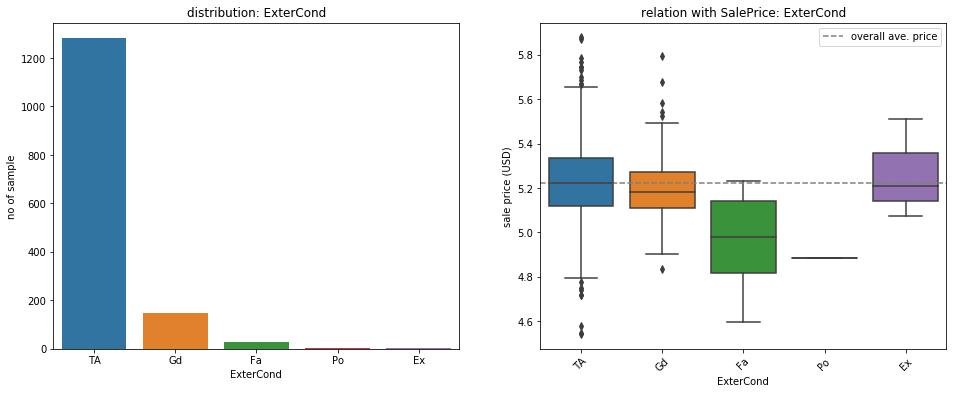

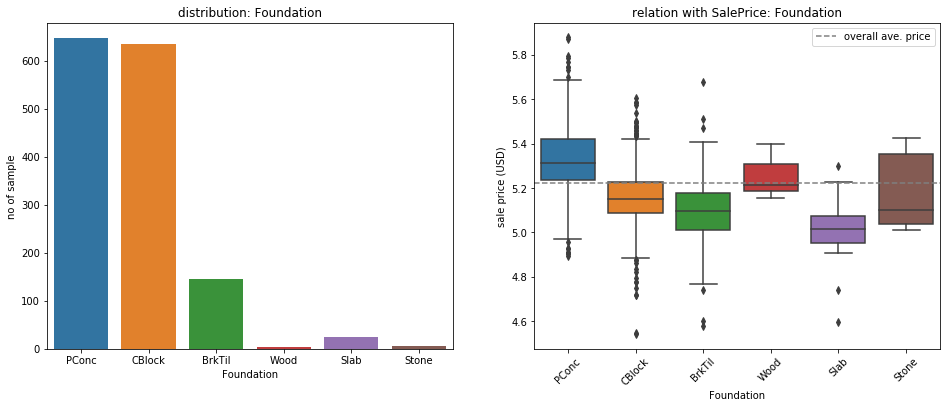

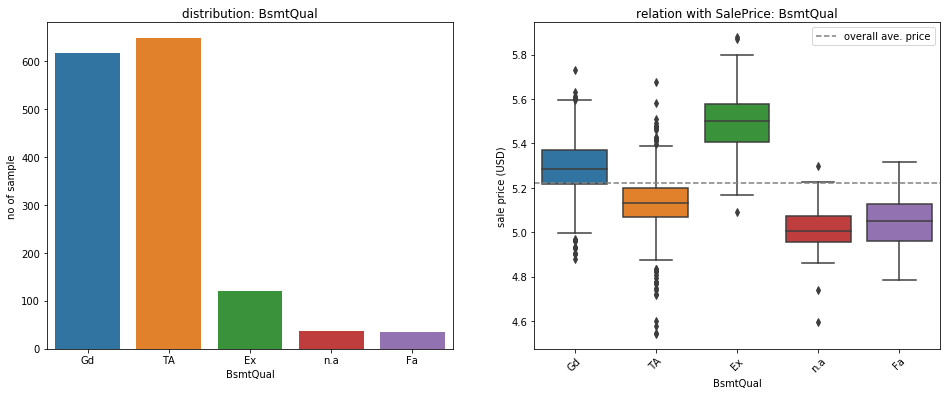

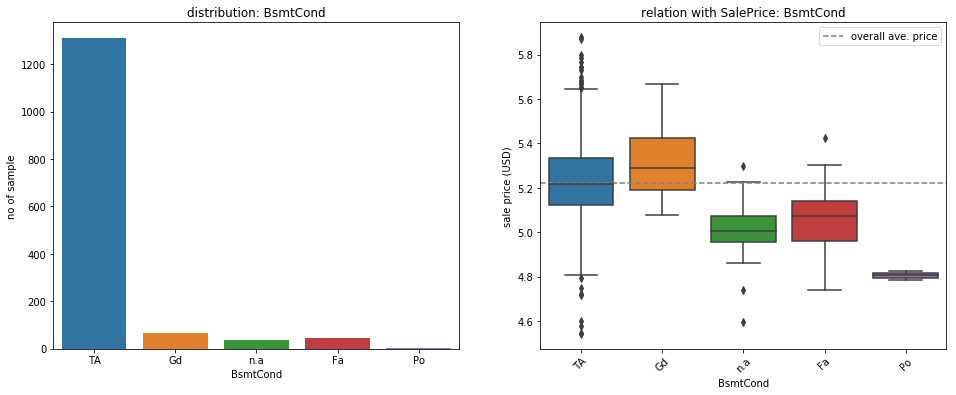

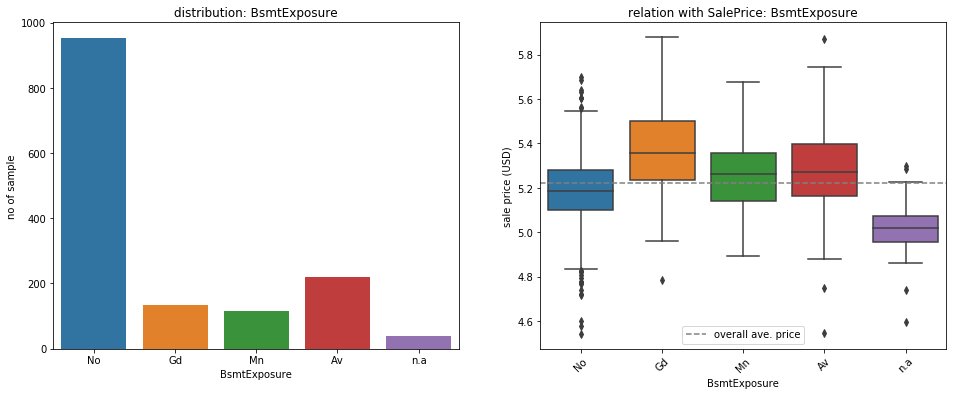

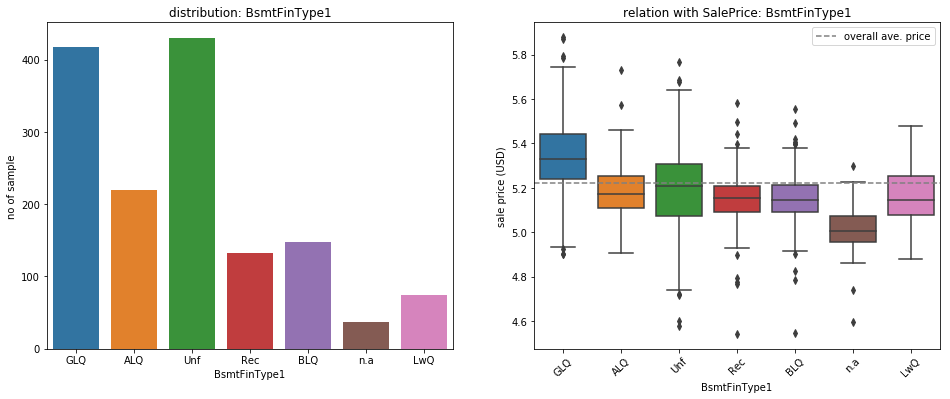

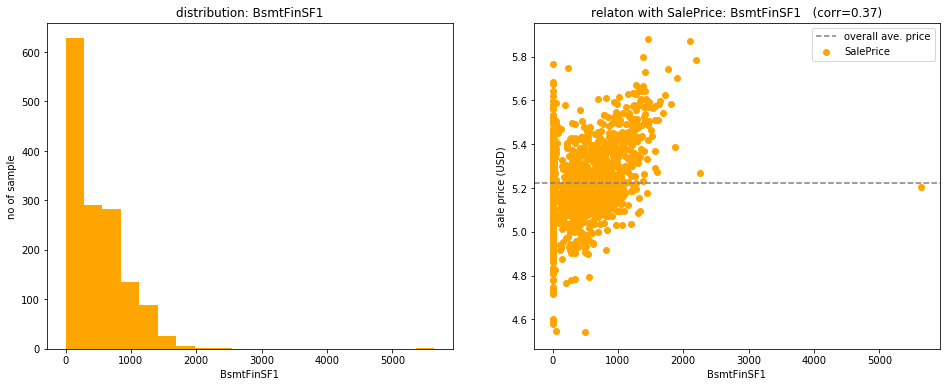

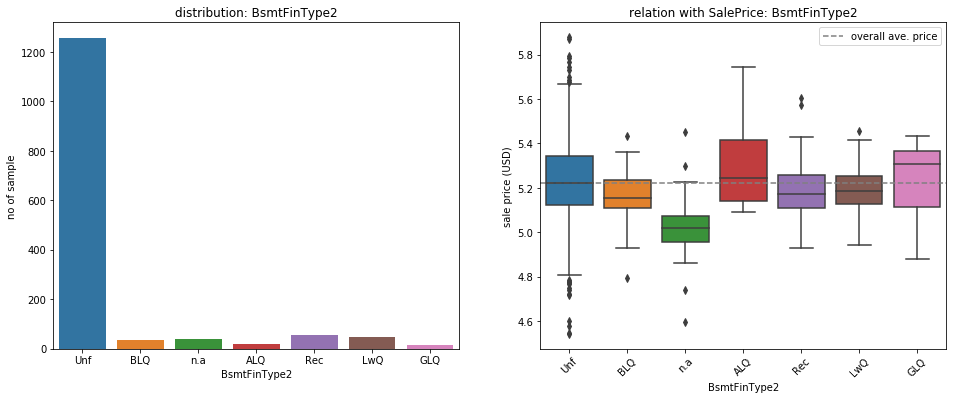

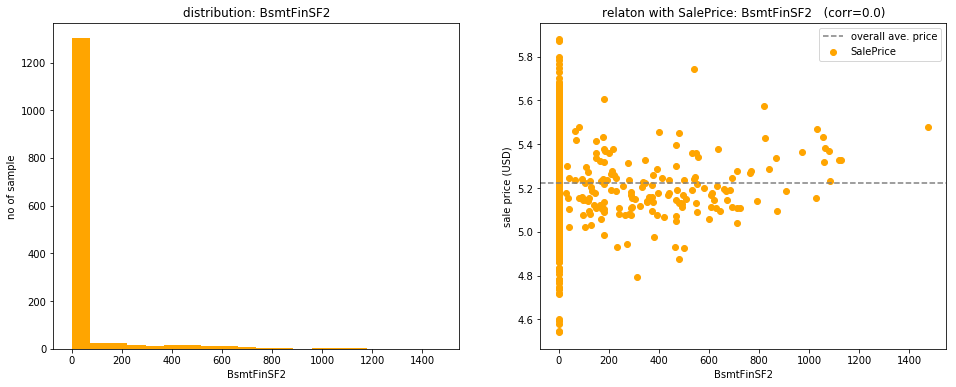

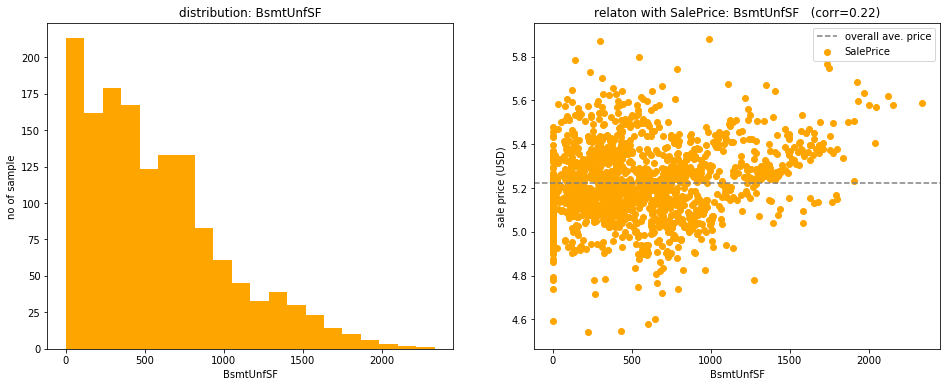

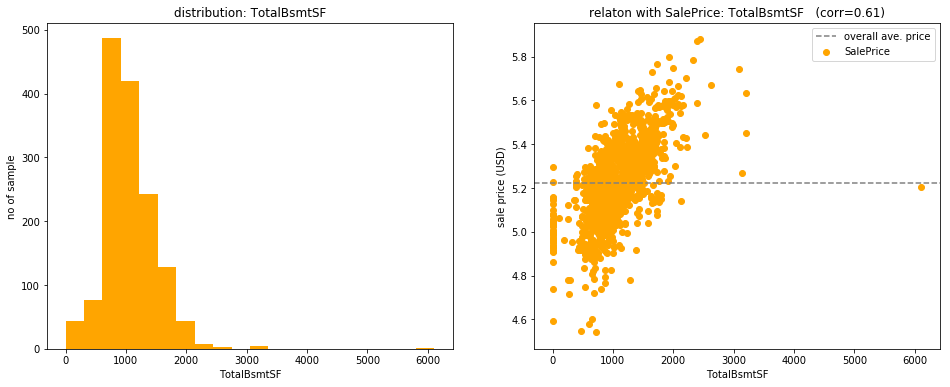

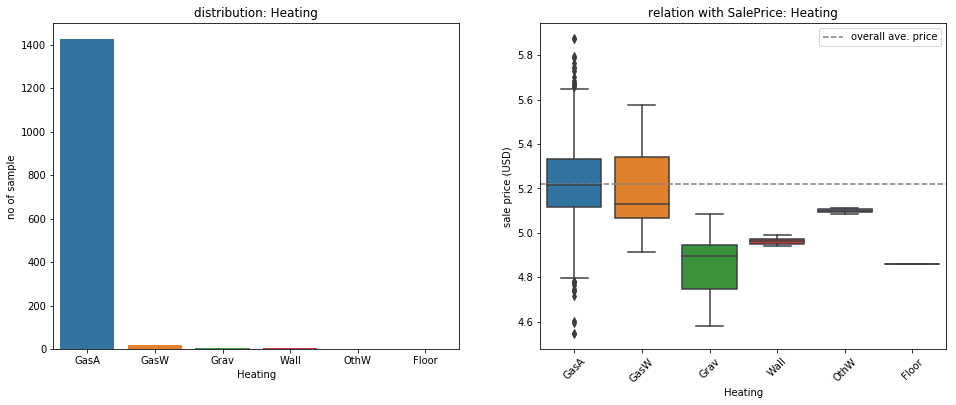

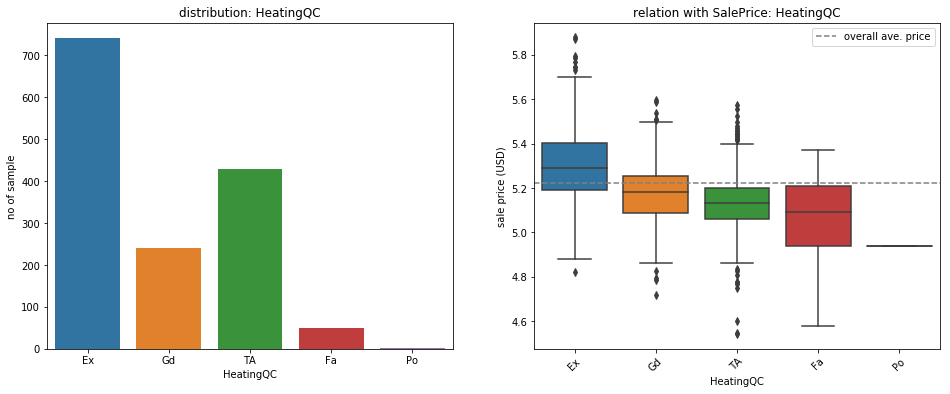

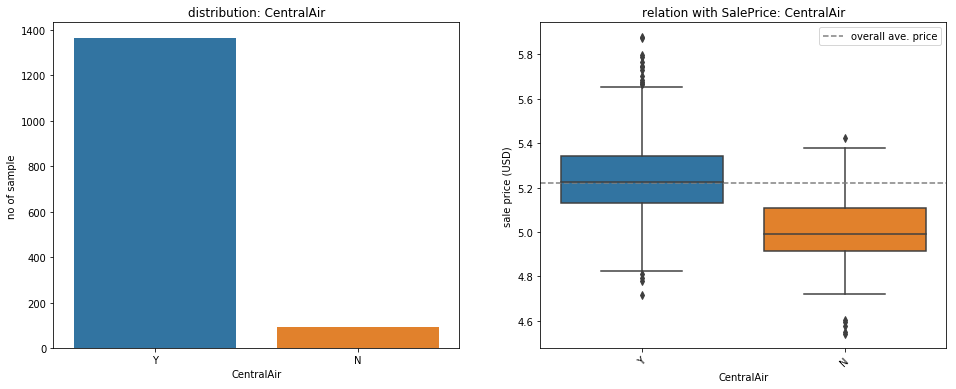

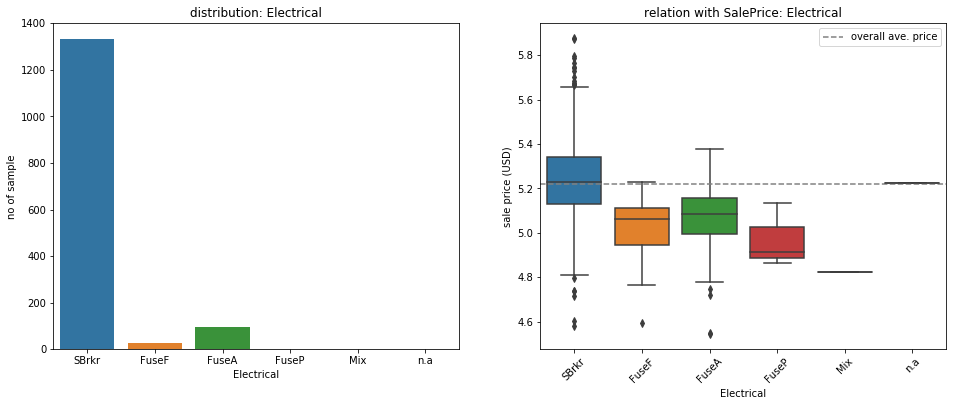

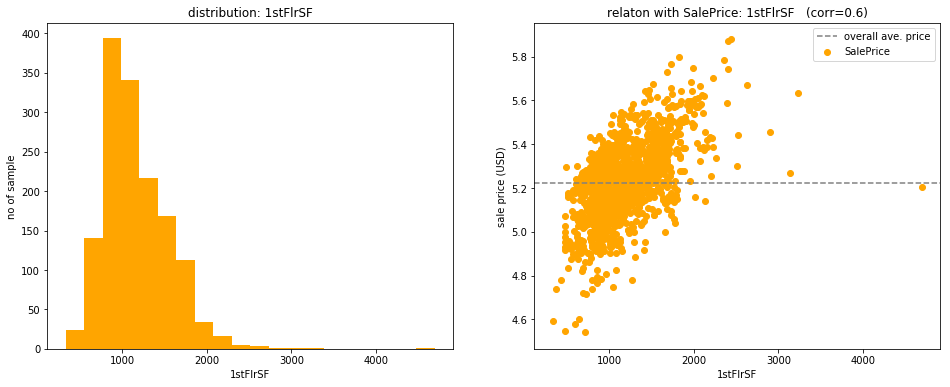

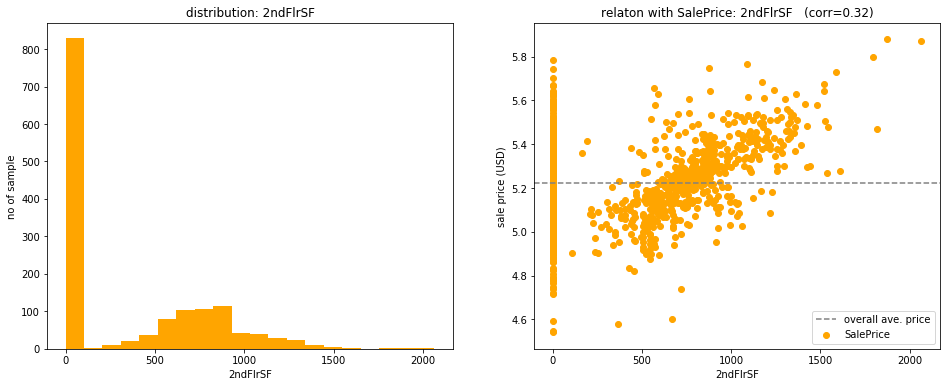

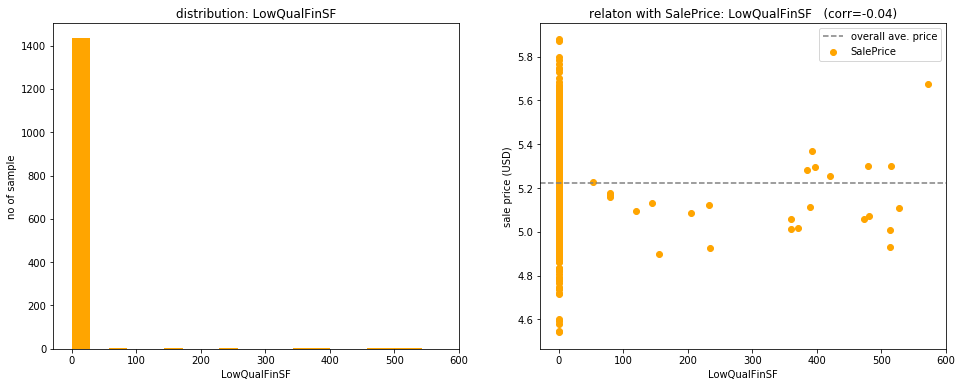

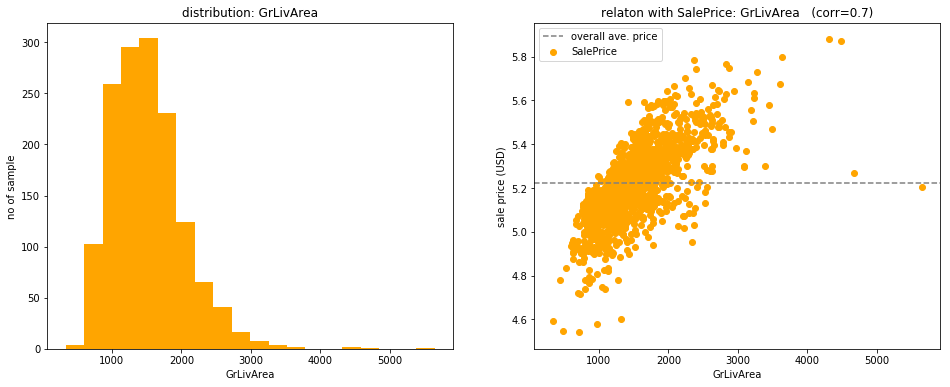

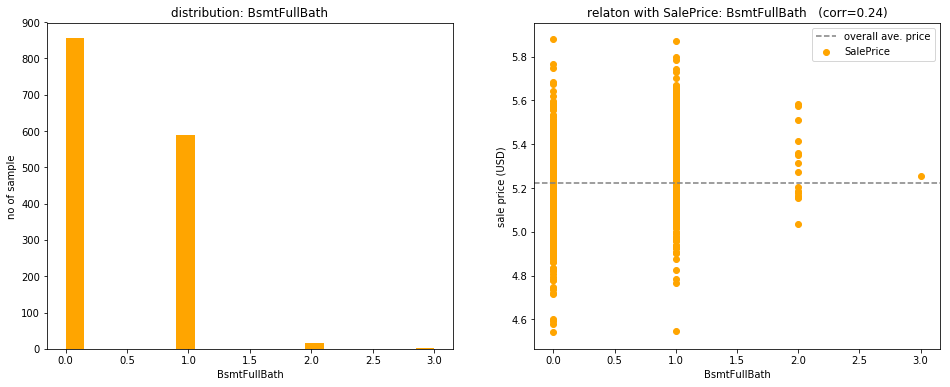

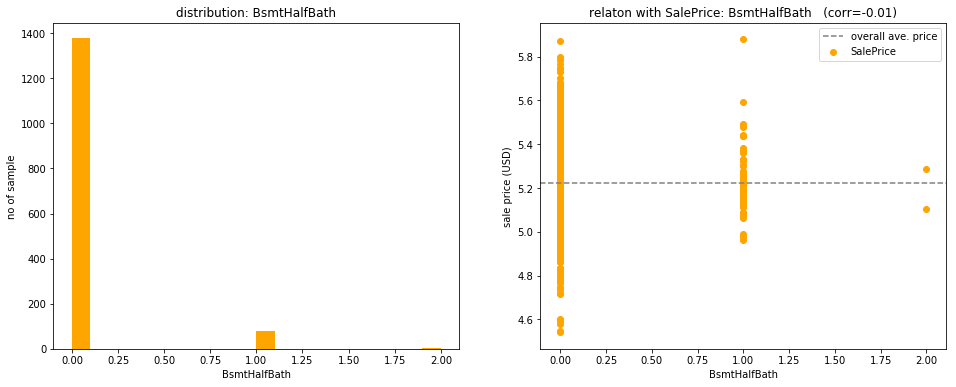

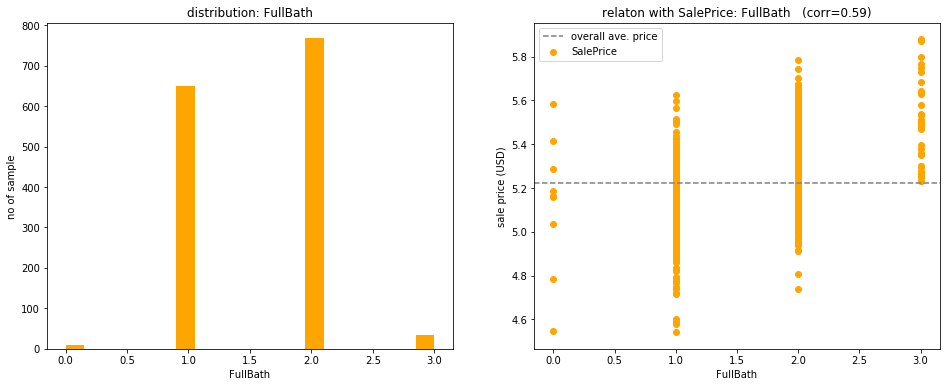

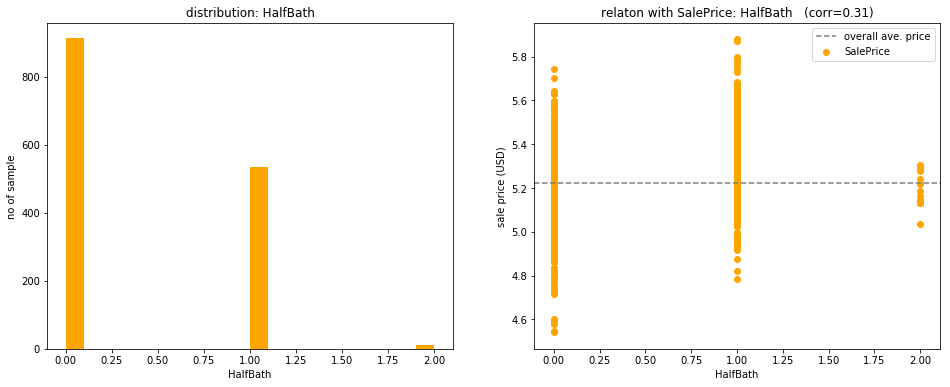

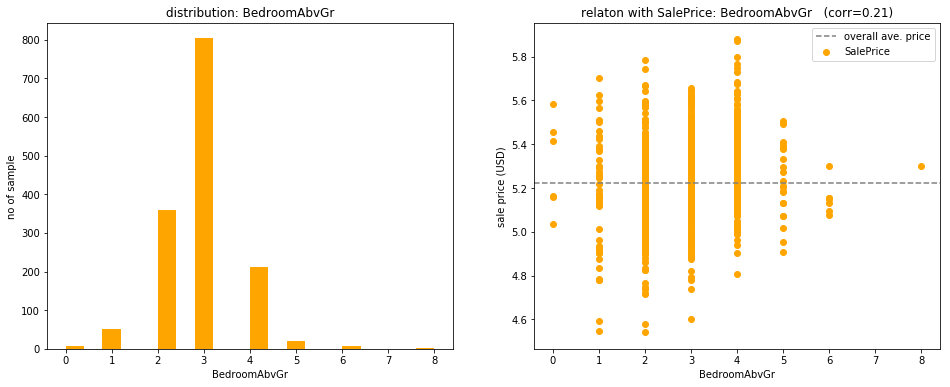

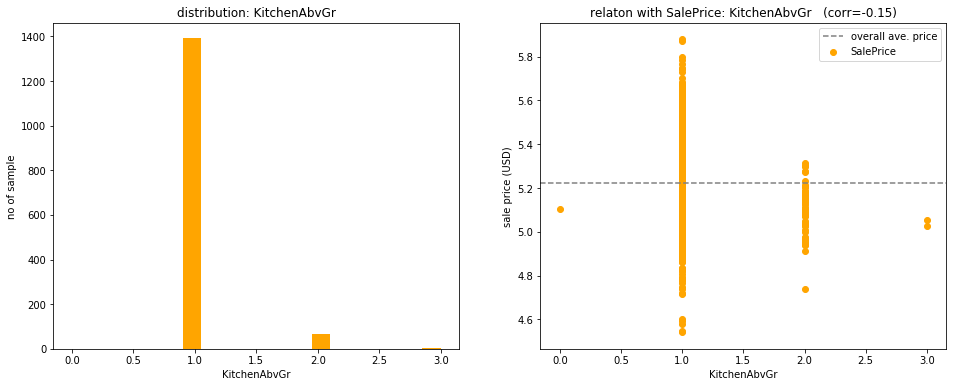

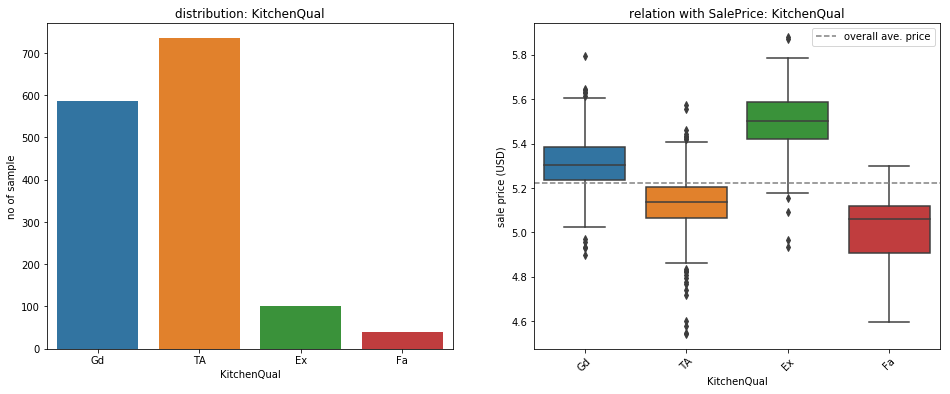

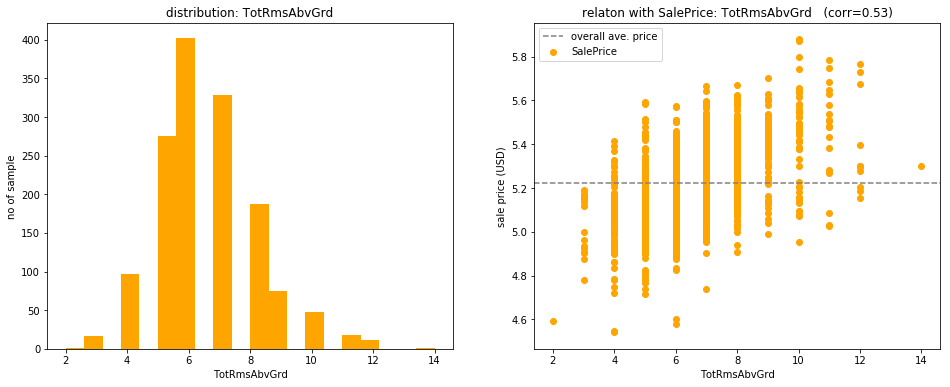

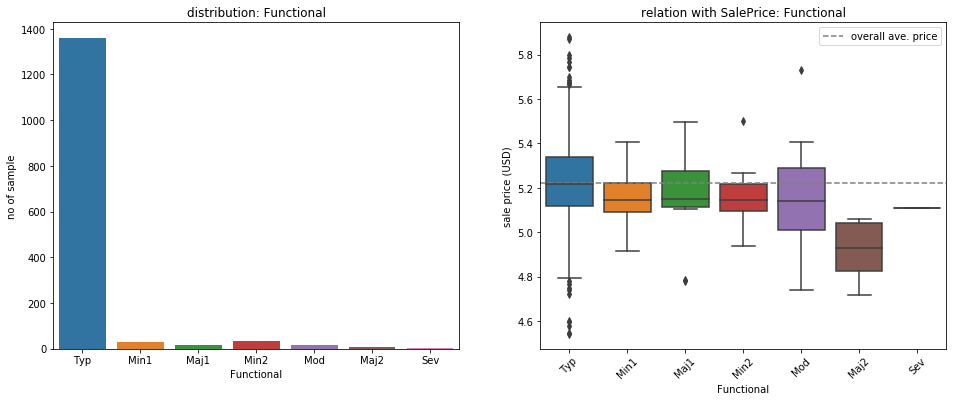

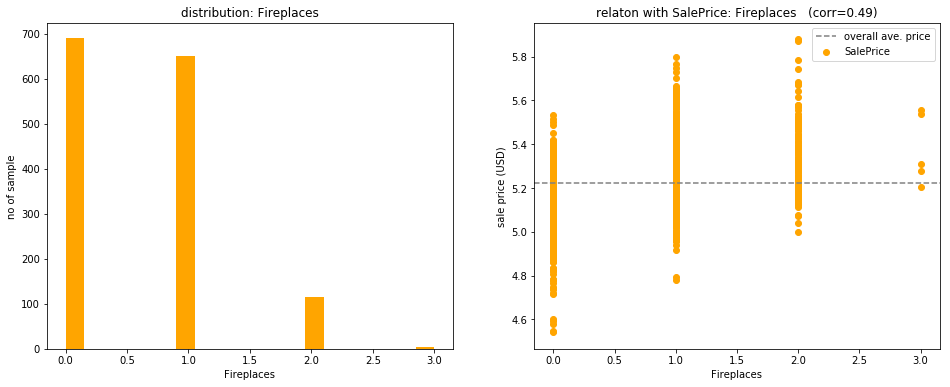

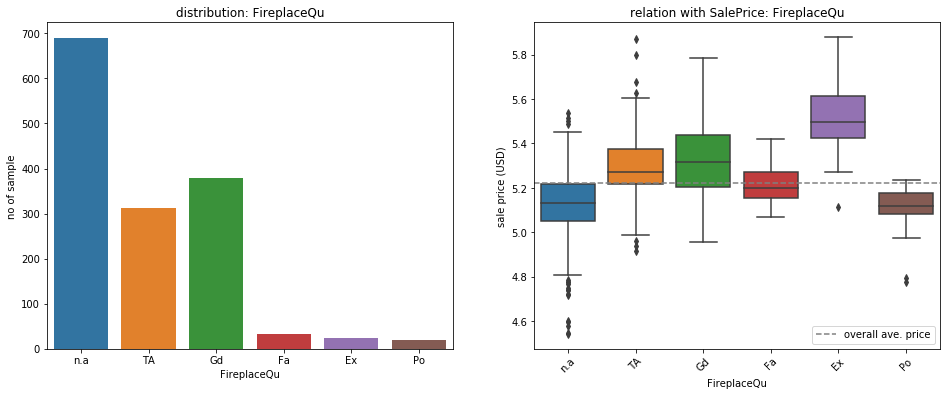

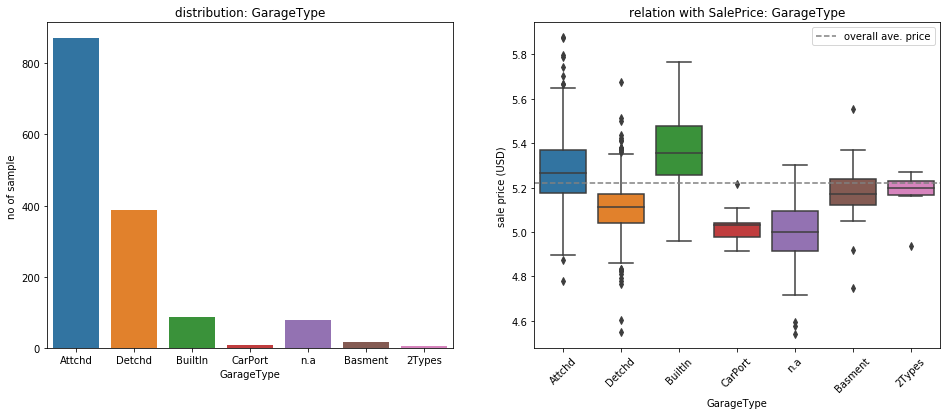

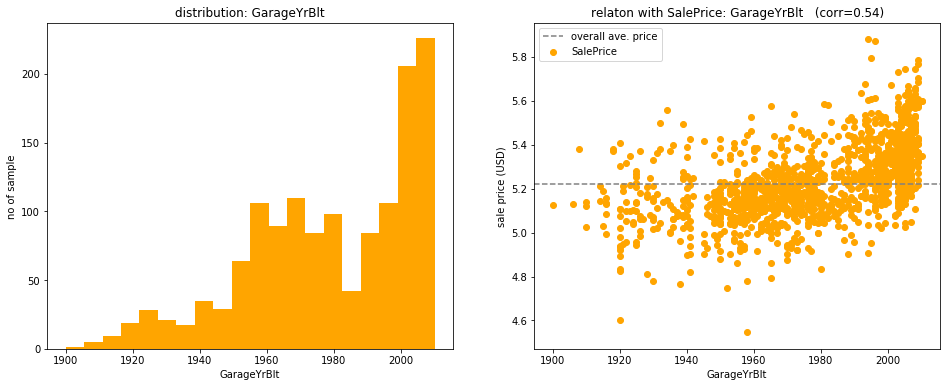

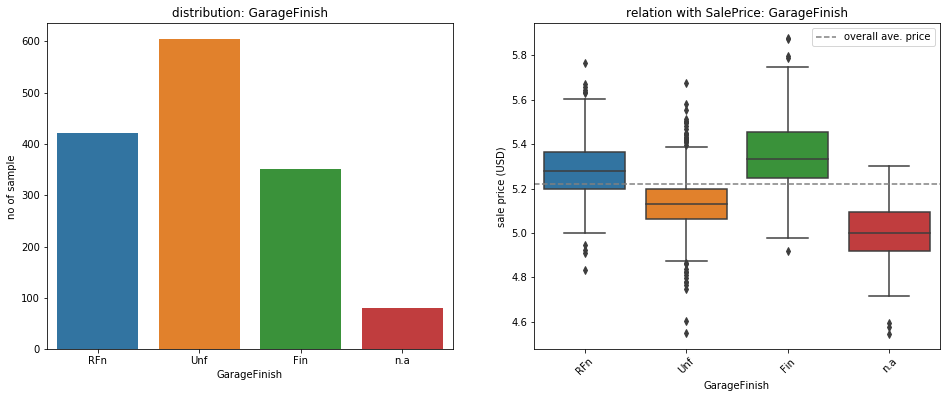

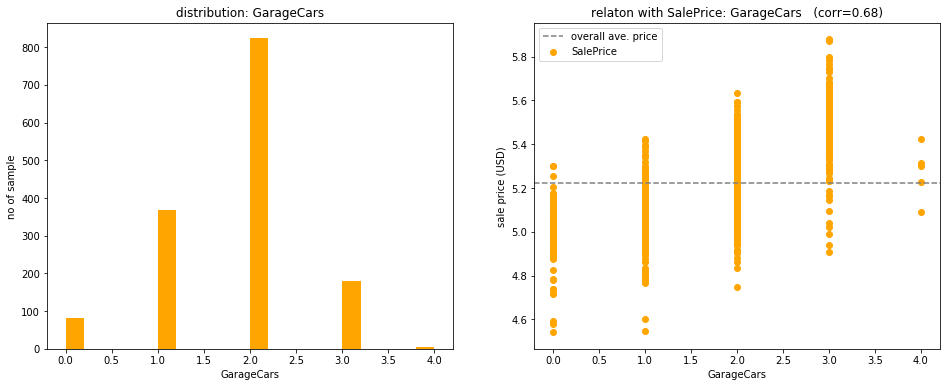

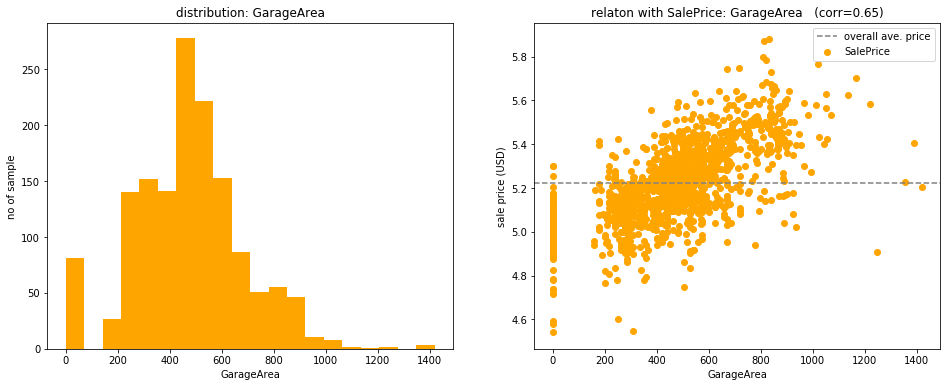

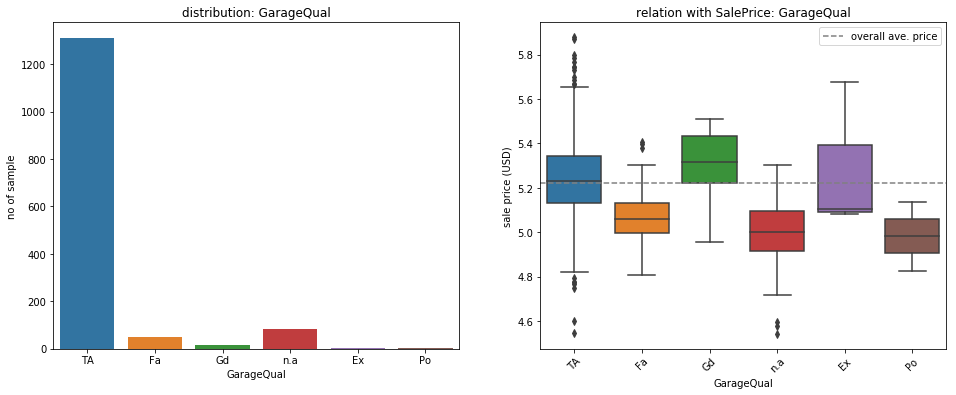

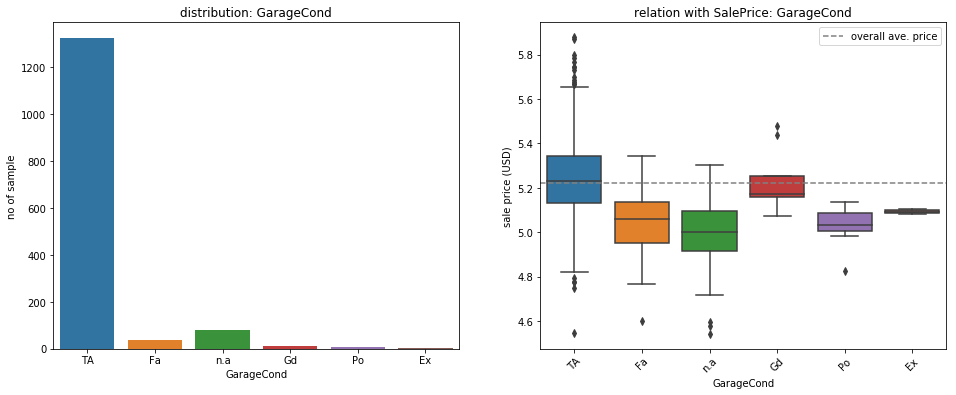

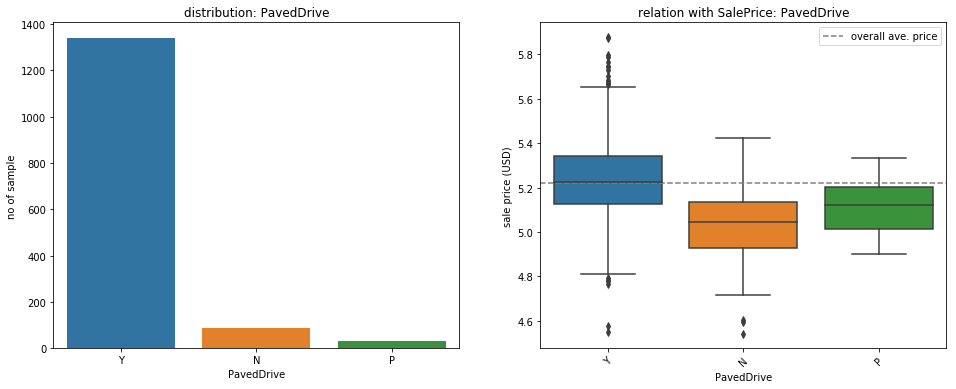

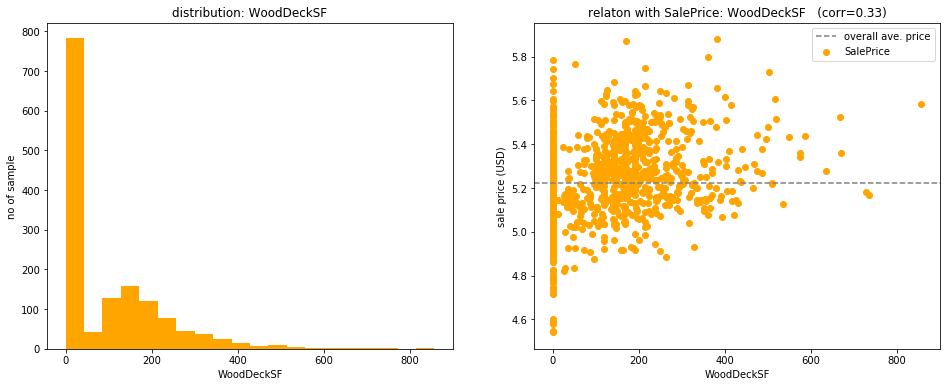

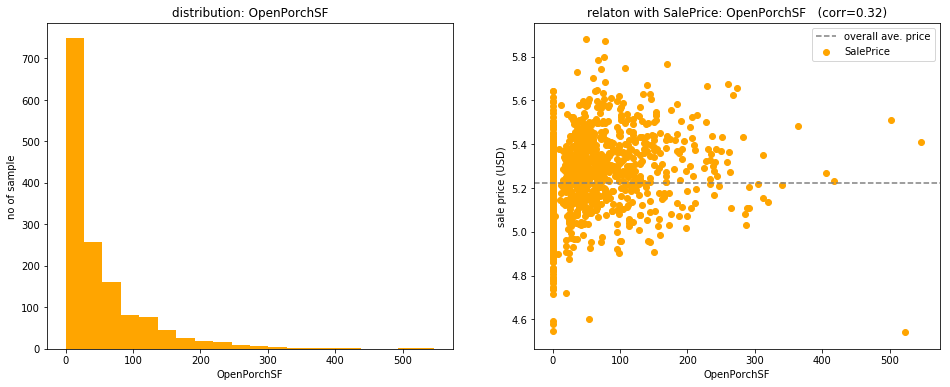

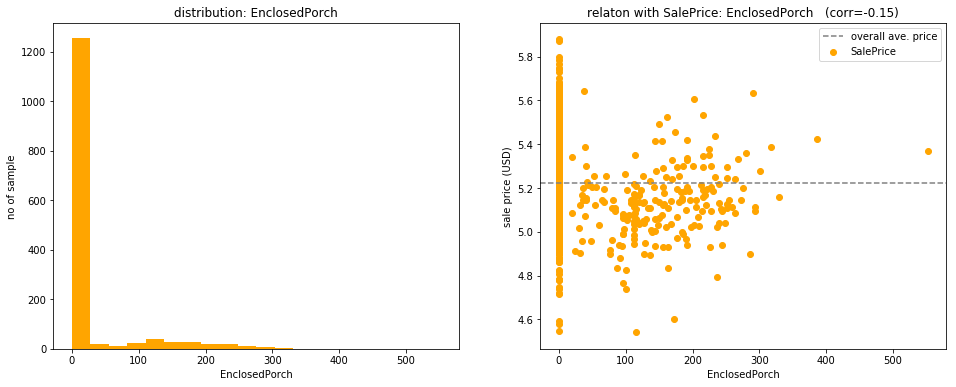

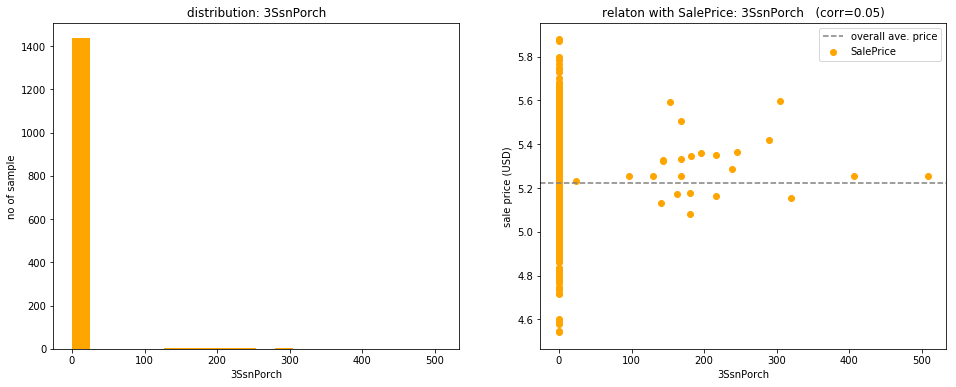

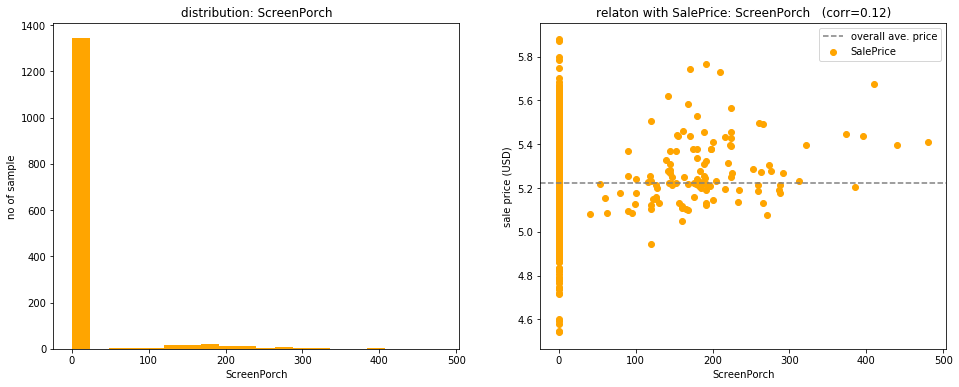

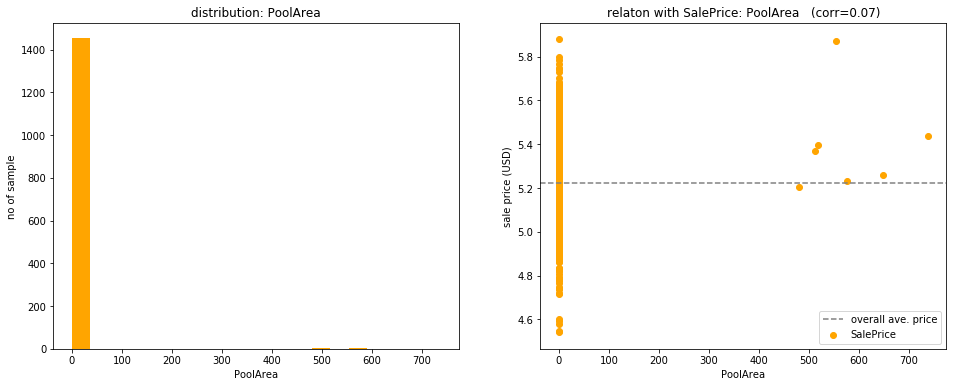

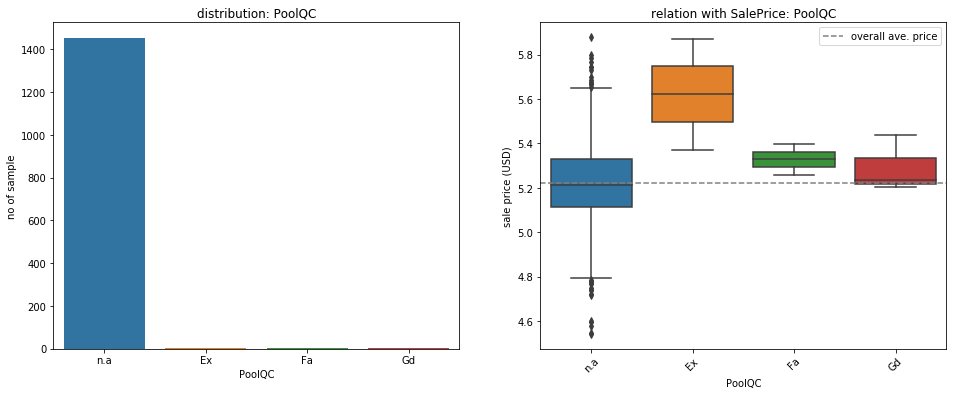

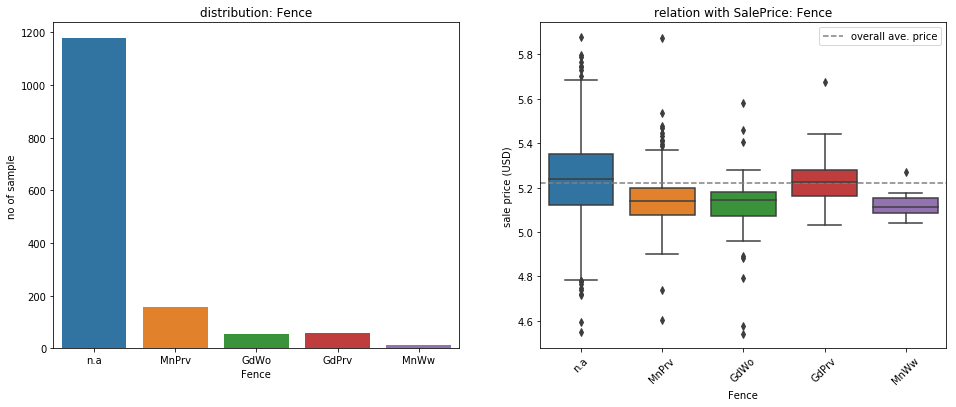

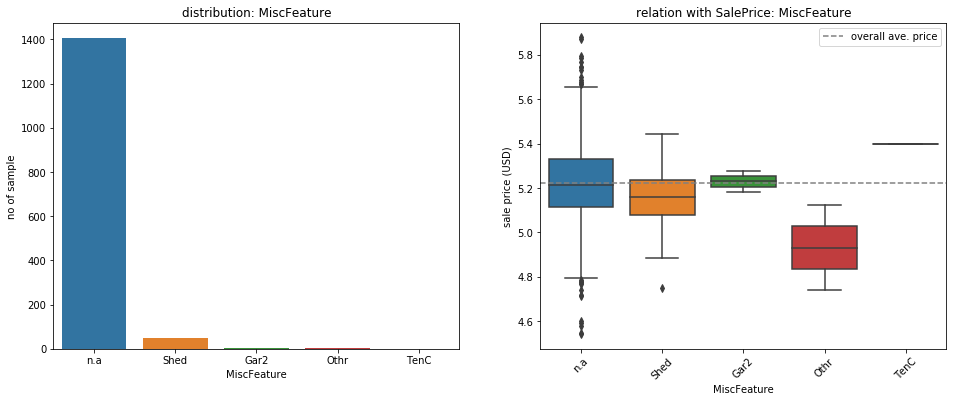

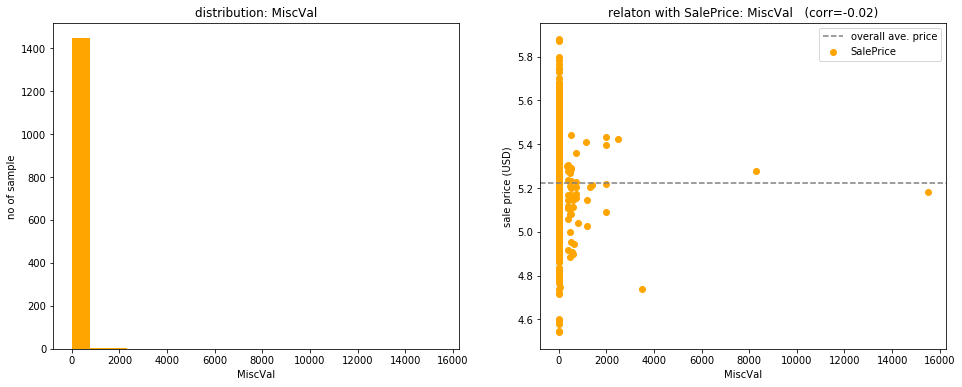

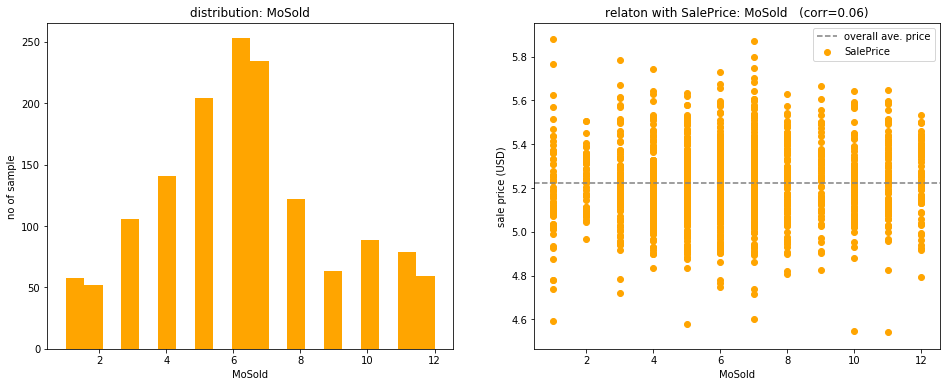

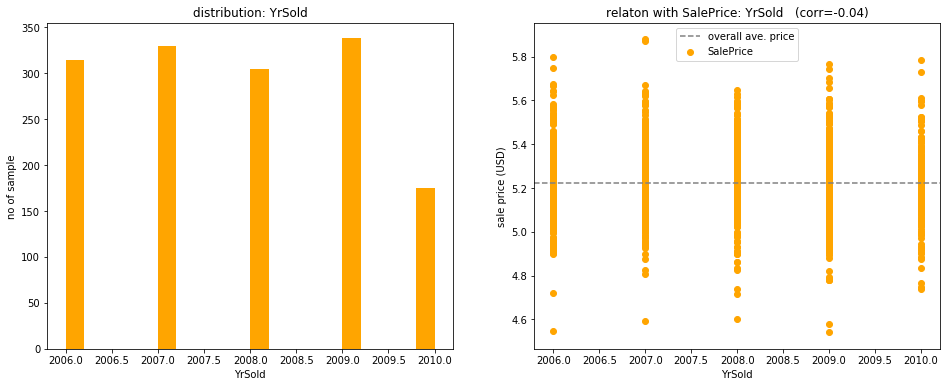

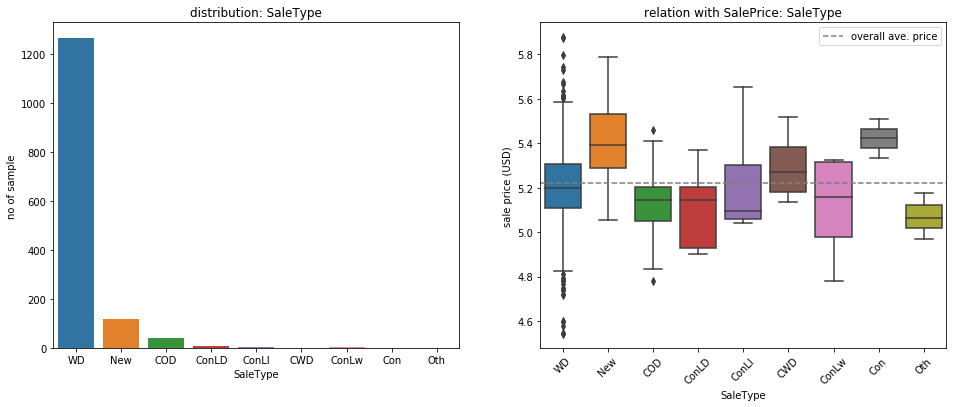

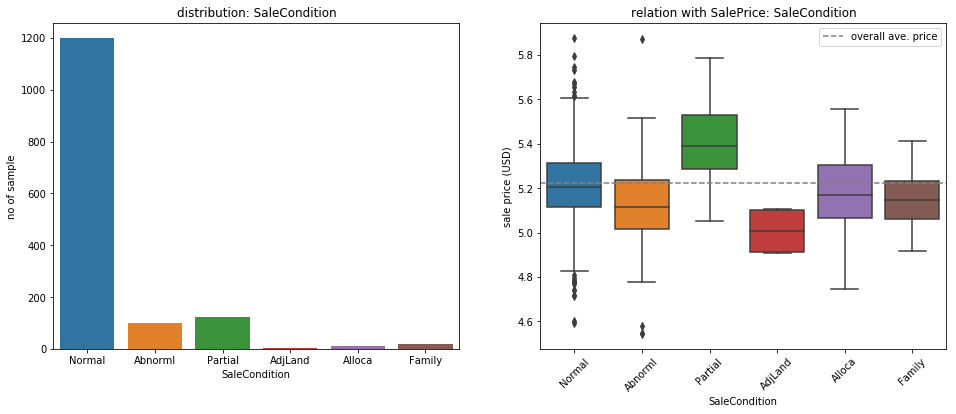

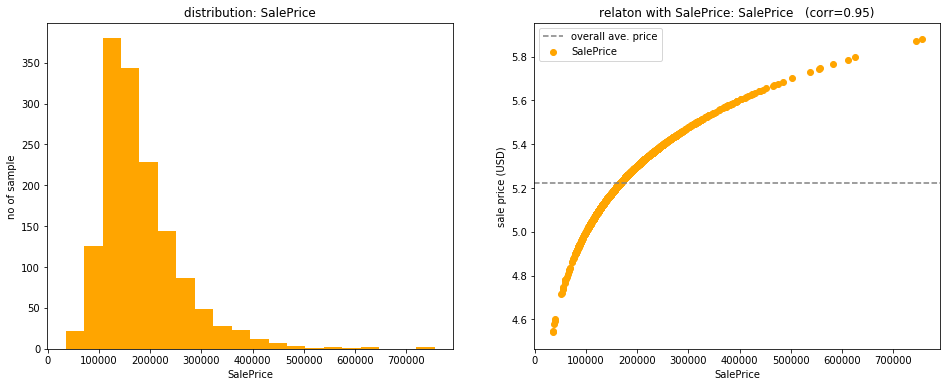

In [16]:

y_price =    np.log10(train_df['SalePrice'])
price_mean = np.log10(train_df['SalePrice']).mean()

corr_series = pd.Series([])

for column_name in train_df:
    dt = train_df[column_name].dtypes
#print(column_name, '\t\t(',dt,')')
    if dt == 'int64' or dt=='float64': 
        
        corr = train_df[column_name].corr(y_price).round(2)
        
        fig = plt.figure(figsize=(16,6))
        ax = fig.add_subplot(1,2,1)
        ax.hist(train_df[column_name], color='orange', bins = 20)
        ax.set_title('distribution: '+column_name )
        ax.set_xlabel(column_name)
        ax.set_ylabel('no of sample')
        bx = fig.add_subplot(1,2,2)
        bx.scatter(train_df[column_name], y_price,color='orange')
        bx.set_title('relaton with SalePrice: '+column_name  + '   (corr=' + str(corr) +')')
        bx.set_xlabel(column_name)
        bx.set_ylabel('sale price (USD)')
        bx.axhline(y=price_mean,color= "grey" ,linestyle='--', label='overall ave. price')  
        bx.legend()
        fig.show()
        
        corr_series.set_value(column_name, corr)
        
    if dt == 'object':
        fig = plt.figure(figsize=(16,6))
        plt.subplot(1,2,1)
        ax = sns.countplot(x=train_df[column_name], data=train_df)
        ax.set_title('distribution: '+column_name)
        ax.set_ylabel('no of sample')
        plt.subplot(1,2,2)
        bx = sns.boxplot(x=train_df[column_name], y=y_price)
        bx.set_title('relation with SalePrice: '+column_name)
        bx.set_ylabel('sale price (USD)')
        bx.axhline(y=price_mean,color= "grey" ,linestyle='--', label='overall ave. price')  
        bx.legend()
        plt.xticks(rotation=45)
        fig.show()

<br><br><br>
#### b) Charting collectively
<hr>

Here, first see the impact of inpact each variable to SalePrice in collective way to consider which variables to use for the predicting model.  <br>
Seeing number variables and non-number (categorical) variables separately. 
<br><br>
#### b-1) For number variables 
using correlaction with SalePrice  


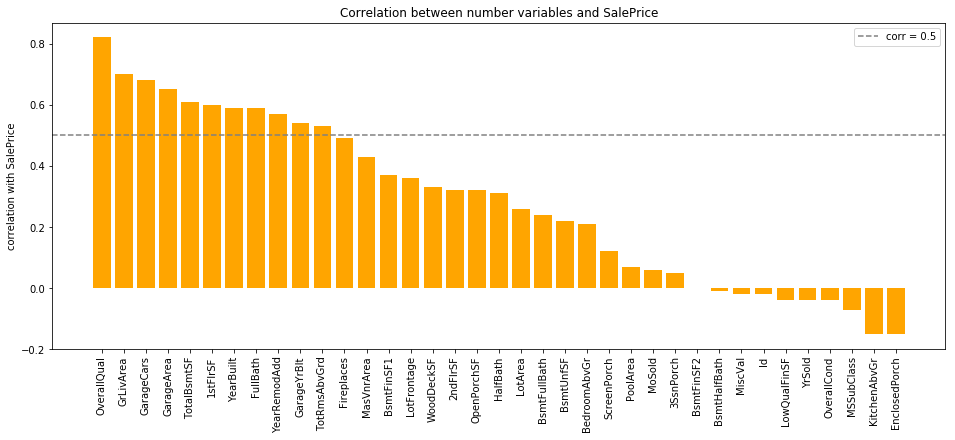

In [17]:
corr_sorted= corr_series.sort_values(ascending=False).drop('SalePrice')

fig = plt.figure(figsize=(16,6))
plt.subplot(1,1,1)
ax = plt.bar(corr_sorted.index,height=corr_sorted, color='orange')
plt.axhline(y=0.5,color= "grey" ,linestyle='--', label='corr = 0.5')
plt.title('Correlation between number variables and SalePrice')
plt.ylabel('correlation with SalePrice')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


<br><br>
Seeing the chart above, following variables have strong correlation with the price of house (chosing correlation > 0.50) 

- Overall Quality 
- GrLivArea 
- Garage Cars 
- Garage Area
- Total Basement Area (square feet)     
- Full Bath
- 1st Floor Area (squire feet)   -- This may be duplicated with Total Basement Area
- Total Rms Abv Grd 
- Year of Built 
- Year of Remod Add

Some maybe correlated together can cannot be used together. see this point later


#### b-2) For non-numerical (categorical) variables

<br><br>


In [18]:
pd_group = pd.DataFrame([]) 
min_samples_ratio = 0.05

for column_name in train_df:
    dt = train_df[column_name].dtypes
    if dt == 'object':
        
        groupCount      = train_df.groupby(column_name)['SalePrice'].count()
        groupMean       = train_df.groupby(column_name)['SalePrice'].mean()
        groupStd        = train_df.groupby(column_name)['SalePrice'].std()
        mdiff_div_std   = (groupMean- price_mean)/groupStd
        groupIndex      = column_name +'-->' +groupCount.index
        con = pd.concat([mdiff_div_std, groupCount],axis =1)
        con.columns = ['mdiff_div_std','count']
        con.index   = column_name + '->' +  con.index 
        pd_group = pd.concat([pd_group,con])

pd_group['abs_mdiff_div_std'] = np.abs(pd_group['mdiff_div_std'] )
        
pd_group.head()

,mdiff_div_std,count,abs_mdiff_div_std
MSZoning->C (all),2.205397,10,2.205397
MSZoning->FV,4.086504,65,4.086504
MSZoning->RH,3.683506,16,3.683506
MSZoning->RL,2.364844,1151,2.364844
MSZoning->RM,2.603199,218,2.603199


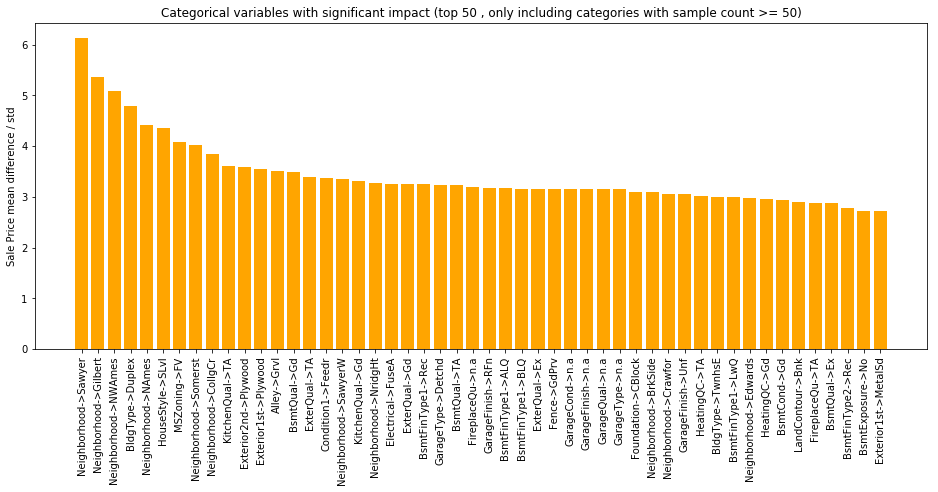

In [19]:
num_of_bars = 50
min_count   = 50 

meandiff_sorted = pd_group[pd_group['count']>=min_count].sort_values(by='abs_mdiff_div_std', ascending=False)[:num_of_bars]

fig = plt.figure(figsize=(16,6))
plt.subplot(1,1,1)
ax = plt.bar(meandiff_sorted.index,height=meandiff_sorted['abs_mdiff_div_std'], color='orange')
plt.title('Categorical variables with significant impact (top %s , only including categories with sample count >= %s)' % (num_of_bars, min_count))
plt.ylabel('Sale Price mean difference / std')
plt.xticks(rotation='vertical')

plt.show()

Seeing above, folloing categorical variables may useful

- Neighborhood 
- BldgType 
- HouseStype
- MSZoning



# Step 3 : Adding/Processing variables (features) of the dataset 
<hr>

## Processing variables
<hr>

Categorical variables(features) into "1 or 0" variables so that the model can recognize

<br>


In [20]:
train_df = pd.read_csv('../data/train.csv')  # Used for training and pre-testing
test_df  = pd.read_csv('../data/test.csv')  # Used later when submitting


mod_features = pd.DataFrame()

mod_features['Neighborhood-high'] = train_df['Neighborhood'].apply(lambda x: 1 if (x == 'StoneBr' or x=='NoRide' or x=='NridgHt')  else 0)
mod_features['Neighborhood-low'] = train_df['Neighborhood'].apply(lambda x: 1 if (x == 'OldTown' or x=='MeadowW' or x=='Edwards' or x=='BrkSide')  else 0)
#mod_features['IsNeighborhood-Edwards'] = train_df['Neighborhood'].apply(lambda x: 1 if x == 'Edwards' else 0)
mod_features['IsMSZoning-FV'] = train_df['MSZoning'].apply(lambda x: 1 if x == 'FV' else 0)
mod_features['IsHouseStyle-SLvl'] = train_df['HouseStyle'].apply(lambda x: 1 if x == 'SLvl' else 0)

#print(mod_features)

dummies = pd.get_dummies(train_df[['Neighborhood','SaleCondition','SaleType','MiscFeature','Fence','GarageType',
                                               'Functional','Electrical','CentralAir','Heating','BsmtFinType2','BsmtFinType1',
                                               'BsmtExposure','Foundation','MasVnrType','Exterior2nd','Exterior1st','RoofMatl',
                                               'RoofStyle','HouseStyle','BldgType','Condition1','Condition2','Street',
                                               'MSZoning','LandSlope','LotConfig','Utilities','LandContour','Alley']], 
                         drop_first=True, columns=['Neighborhood','SaleCondition','SaleType','MiscFeature','Fence','GarageType',
                                               'Functional','Electrical','CentralAir','Heating','BsmtFinType2','BsmtFinType1',
                                               'BsmtExposure','Foundation','MasVnrType','Exterior2nd','Exterior1st','RoofMatl',
                                               'RoofStyle','HouseStyle','BldgType','Condition1','Condition2','Street',
                                               'MSZoning','LandSlope','LotConfig','Utilities','LandContour','Alley'])



mod_features = pd.concat([mod_features,dummies],axis=1)


# Do the same things for test_df  

mod_featurest =  pd.DataFrame()

mod_featurest['Neighborhood-high'] = test_df['Neighborhood'].apply(lambda x: 1 if (x == 'StoneBr' or x=='NoRide' or x=='NridgHt')  else 0)
mod_featurest['Neighborhood-low'] = test_df['Neighborhood'].apply(lambda x: 1 if (x == 'OldTown' or x=='MeadowW' or x=='Edwards' or x=='BrkSide')  else 0)
mod_featurest['IsMSZoning-FV'] = test_df['MSZoning'].apply(lambda x: 1 if x == 'FV' else 0)
mod_featurest['IsHouseStyle-SLvl'] = test_df['HouseStyle'].apply(lambda x: 1 if x == 'SLvl' else 0)

dummiest = pd.get_dummies(test_df[['Neighborhood','SaleCondition','SaleType','MiscFeature','Fence','GarageType',
                                               'Functional','Electrical','CentralAir','Heating','BsmtFinType2','BsmtFinType1',
                                               'BsmtExposure','Foundation','MasVnrType','Exterior2nd','Exterior1st','RoofMatl',
                                               'RoofStyle','HouseStyle','BldgType','Condition1','Condition2','Street',
                                               'MSZoning','LandSlope','LotConfig','Utilities','LandContour','Alley']], 
                         drop_first=True, columns=['Neighborhood','SaleCondition','SaleType','MiscFeature','Fence','GarageType',
                                               'Functional','Electrical','CentralAir','Heating','BsmtFinType2','BsmtFinType1',
                                               'BsmtExposure','Foundation','MasVnrType','Exterior2nd','Exterior1st','RoofMatl',
                                               'RoofStyle','HouseStyle','BldgType','Condition1','Condition2','Street',
                                               'MSZoning','LandSlope','LotConfig','Utilities','LandContour','Alley'])

missing_cols = set( dummies.columns ) - set( dummiest.columns )
missing_cols
for column in missing_cols:
    dummiest[column] = 0
    
mod_featurest = pd.concat([mod_featurest,dummiest],axis=1) 

    
mod_featurest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 172 entries, Neighborhood-high to RoofMatl_Roll
dtypes: int64(20), uint8(152)
memory usage: 444.6 KB


Then, changing from categorical to numeric 

In [21]:

mod_features['GarageQualM'] = train_df['GarageQual'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
mod_features['GarageCondM'] = train_df['GarageCond'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
mod_features['PoolQCM']     = train_df['PoolQC'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
mod_features['ExterQualM'] = train_df['ExterQual'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
mod_features['ExterCondM'] = train_df['ExterCond'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
mod_features['BsmtQualM'] = train_df['BsmtQual'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
mod_features['BsmtCondM'] = train_df['BsmtCond'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
mod_features['HeatingQCM'] = train_df['HeatingQC'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
mod_features['KitchenQualM'] = train_df['KitchenQual'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
mod_features['FireplaceQuM'] = train_df['FireplaceQu'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)

mod_features['PavedDriveM'] = train_df['PavedDrive'].apply(lambda x: 2 if x=='Y' else 1 if x=='P' else 0)

mod_features['GarageFinisheM'] = train_df['GarageFinish'].apply(lambda x: 3 if x=='Fin' else 2 if x=='RFn' else 1 if x == 'Unf'  else 0)

mod_features['LotShapeM'] = train_df['LotShape'].apply(lambda x: 3 if x=='IR3' else 2 if x=='IR2' else 1 if x == 'IR1'  else 0)



mod_featurest['GarageQualM'] = test_df['GarageQual'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
mod_featurest['GarageCondM'] = test_df['GarageCond'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
mod_featurest['PoolQCM']     = test_df['PoolQC'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
mod_featurest['ExterQualM'] = test_df['ExterQual'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
mod_featurest['ExterCondM'] = test_df['ExterCond'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
mod_featurest['BsmtQualM'] = test_df['BsmtQual'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
mod_featurest['BsmtCondM'] = test_df['BsmtCond'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
mod_featurest['HeatingQCM'] = test_df['HeatingQC'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
mod_featurest['KitchenQualM'] = test_df['KitchenQual'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)
mod_featurest['FireplaceQuM'] = test_df['FireplaceQu'].apply(lambda x: 5 if x=='Ex' else 4 if x=='Gd' else 3 if x == 'TA' else 2 if x=='Fa' else 1 if x=='Po' else 0)

mod_featurest['PavedDriveM'] = test_df['PavedDrive'].apply(lambda x: 2 if x=='Y' else 1 if x=='P' else 0)

mod_featurest['GarageFinisheM'] = test_df['GarageFinish'].apply(lambda x: 3 if x=='Fin' else 2 if x=='RFn' else 1 if x == 'Unf'  else 0)

mod_featurest['LotShapeM'] = test_df['LotShape'].apply(lambda x: 3 if x=='IR3' else 2 if x=='IR2' else 1 if x == 'IR1'  else 0)

mod_featurest.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 185 entries, Neighborhood-high to LotShapeM
dtypes: int64(33), uint8(152)
memory usage: 592.8 KB


## Adding new variables (features)
<hr>

Logically, following variables (features) may have influence 

<br>

- age at sold   : (sold year) - (renovated or built year)
- YearMonth     : Combining year and month ( the impact of the financial crisis may be seen in monthly or quarterly)


<br>
<br>




 



In [135]:
# making year from last renovation

new_features = train_df[['YearBuilt', 'YearRemodAdd', 'SalePrice']]
new_features['ageAtSold'] = train_df.loc[:,'YrSold'] - train_df.loc[:,'YearRemodAdd']
new_features = pd.concat([new_features,mod_features],axis=1)

new_featurest = test_df[['YearBuilt', 'YearRemodAdd']]
new_featurest['ageAtSold'] = test_df.loc[:,'YrSold'] - test_df.loc[:,'YearRemodAdd']
new_featurest = pd.concat([new_featurest,mod_featurest],axis=1)

new_featurest.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 188 entries, YearBuilt to LotShapeM
dtypes: int64(36), uint8(152)
memory usage: 627.0 KB


d:\y-data\venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
d:\y-data\venv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [136]:
# making Yearmonth

MoYrSold = pd.DataFrame()
MoYrSold = train_df['YrSold'].astype(str)+((train_df['MoSold']+2)//3).astype(str).apply(lambda x: x.zfill(2))
MoYrSold = MoYrSold.rename('MoYrSold')
MoYrSold = MoYrSold.astype(str)
print(MoYrSold.mean())

new_features = pd.concat([new_features, MoYrSold], axis=1)

new_features.info()

inf
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 190 entries, YearBuilt to MoYrSold
dtypes: int64(21), object(1), uint8(168)
memory usage: 490.5+ KB


Seeing the modified variables (fetures) to see on charts

In [137]:
new_features.head()

,YearBuilt,YearRemodAdd,SalePrice,ageAtSold,Neighborhood-high,Neighborhood-low,IsMSZoning-FV,IsHouseStyle-SLvl,Neighborhood_Blueste,Neighborhood_BrDale,...,ExterCondM,BsmtQualM,BsmtCondM,HeatingQCM,KitchenQualM,FireplaceQuM,PavedDriveM,GarageFinisheM,LotShapeM,MoYrSold
0,2003,2003,208500,5,0,0,0,0,0,0,...,3,4,3,5,4,0,2,2,0,200801
1,1976,1976,181500,31,0,0,0,0,0,0,...,3,4,3,5,3,3,2,2,0,200702
2,2001,2002,223500,6,0,0,0,0,0,0,...,3,4,3,5,4,3,2,2,1,200803
3,1915,1970,140000,36,0,0,0,0,0,0,...,3,3,4,4,4,4,2,1,1,200601
4,2000,2000,250000,8,0,0,0,0,0,0,...,3,4,3,5,4,3,2,2,1,200804


In [ ]:
y_price =    np.log10(new_features['SalePrice'])
price_mean = np.log10(new_features['SalePrice']).mean()

corr_series = pd.Series([])

for column_name in new_features:
    dt = new_features[column_name].dtypes
    #print(column_name, '\t\t(',dt,')')
    
    if (dt == 'int64') | (dt=='float64') | (dt=='uint8') |  (dt=='int32'): 
        
        corr = new_features[column_name].corr(y_price).round(2)
        
        fig = plt.figure(figsize=(16,6))
        ax = fig.add_subplot(1,2,1)
        ax.hist(new_features[column_name], color='orange', bins = 20)
        ax.set_title('distribution: '+column_name )
        ax.set_xlabel(column_name)
        ax.set_ylabel('no of sample')
        bx = fig.add_subplot(1,2,2)
        bx.scatter(new_features[column_name], y_price,color='orange')
        bx.set_title('relaton with SalePrice: '+column_name  + '   (corr=' + str(corr) +')')
        bx.set_xlabel(column_name)
        bx.set_ylabel('sale price (USD)')
        bx.axhline(y=price_mean,color= "grey" ,linestyle='--', label='overall ave. price')  
        bx.legend()
        fig.show()
        
        corr_series.set_value(column_name, corr)
        
    if dt == 'object':
        fig = plt.figure(figsize=(16,6))
        plt.subplot(1,2,1)
        ax = sns.countplot(x=new_features[column_name], data=new_features)
        ax.set_title('distribution: '+column_name)
        ax.set_ylabel('no of sample')
        plt.subplot(1,2,2)
        bx = sns.boxplot(x=new_features[column_name], y=y_price)
        bx.set_title('relation with SalePrice: '+column_name)
        bx.set_ylabel('sale price (USD)')
        bx.axhline(y=price_mean,color= "grey" ,linestyle='--', label='overall ave. price')  
        bx.legend()
        plt.xticks(rotation=45)
        fig.show()

d:\y-data\venv\lib\site-packages\matplotlib\figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
d:\y-data\venv\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
d:\y-data\venv\lib\site-packages\matplotlib\pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


# Step 3-2 : Reducing the features
<hr>


(TBD) maybe using PCA to reduce the features

<br> 


# Step3-3 : Finalising variables to be used for prediction
<hr>

In [145]:
# selecting independent variables to be used for prediction

indep_vars = pd.concat([train_df, new_features], axis=1)
indep_vars = indep_vars.loc[:,~indep_vars.columns.duplicated()]

for column in indep_vars: 
    dt = indep_vars[column].dtypes
    if dt == 'uint8' or dt=='int64' or dt=='float64':
        pass
    else:
        indep_vars = indep_vars.drop([column], axis=1)
        
for column_name in indep_vars:
    indep_vars[[column_name]] = indep_vars[[column_name]].fillna(value=0)
    
indep_vars = indep_vars.drop(['SalePrice'], axis=1)
    
    
# for test data

indep_varst = pd.concat([test_df, new_featurest], axis=1)
indep_varst = indep_varst.loc[:,~indep_varst.columns.duplicated()]

for column in indep_varst: 
    dt = indep_varst[column].dtypes
    if dt == 'uint8' or dt=='int64' or dt=='float64':
        pass
    else:
        indep_varst = indep_varst.drop([column], axis=1)
        
for column_name in indep_varst:
    indep_varst[[column_name]] = indep_varst[[column_name]].fillna(value=0)


print(indep_varst.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 223 entries, Id to LotShapeM
dtypes: float64(11), int64(60), uint8(152)
memory usage: 1.0 MB
None


<br><br>
# Step 4 : Splitting the dataset for modeling
<hr>

here split the "training" data into "traiing" and "pre-test" and use "training" for building model, and "pre-test" for testing.
Given "test data" is for submitting, therefore that is not for internal testing in true meaning (?)

In [146]:
# install sklearn library first
from sklearn.model_selection import train_test_split

In [147]:
x_train, x_pretest, y_train, y_pretest = train_test_split(indep_vars, train_df['SalePrice'], test_size=0.3)

In [148]:
print(x_train.shape, y_train.shape, x_pretest.shape,y_pretest.shape)

(1022, 223) (1022,) (438, 223) (438,)


In [149]:
x_test = indep_varst

<br><br>
# Step 5 : Creating the model
<hr>

Here use Multilinear regression for prediction.
<br><br> The reasons are: <br><br>
- this is one of the basic and easy to implement (others I do not know) 
- predicted variable (Sale Price of the House) is quantitative variable(If that was a qualitative data, may used logistic regression)<br><br>

In [150]:
from sklearn import linear_model

Using multiple variables to estimate

In [151]:
X = x_train
Y = np.log10(y_train)

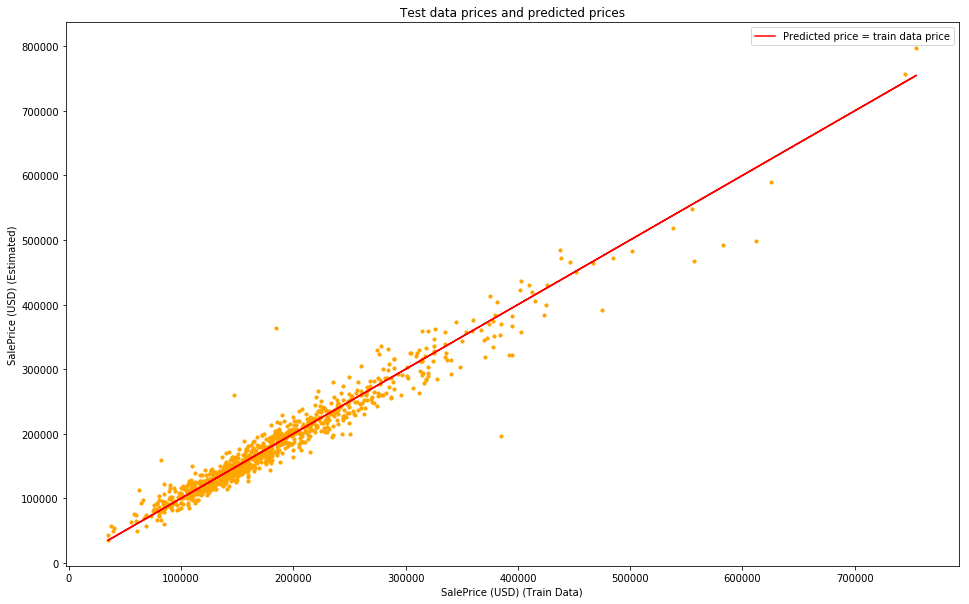

In [152]:
linReg = linear_model.LinearRegression()
linReg.fit(X,Y)

figdataX = 10**Y
figdataY = 10**linReg.predict(X)

plt.figure(figsize=(16,10))
plt.plot(figdataX,figdataX,color='red', label='Predicted price = train data price')
plt.scatter(figdataX,figdataY, s=10, c='orange')
plt.title('Test data prices and predicted prices')
plt.xlabel('SalePrice (USD) (Train Data)')
plt.ylabel('SalePrice (USD) (Estimated)')
plt.legend()

In [153]:
print('score:',linReg.score(X,Y))

score: 0.9453433428807727



<br><br>
Contribution and correlation of each variables are (TBD)

<br><br><br>
# Step 6 : Evaluating/Modifying of the model
<hr>

Using another part of dataset, evaluate the model

<br><br>

According to project overview, the KPI for the evaluation for this project is: <br><br>
Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price
https://www.kaggle.com/c/house-prices-advanced-regression-techniques#evaluation

Here, apply the model to pre-test data

In [154]:
x_pretest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 748 to 672
Columns: 223 entries, Id to LotShapeM
dtypes: float64(3), int64(52), uint8(168)
memory usage: 263.5 KB


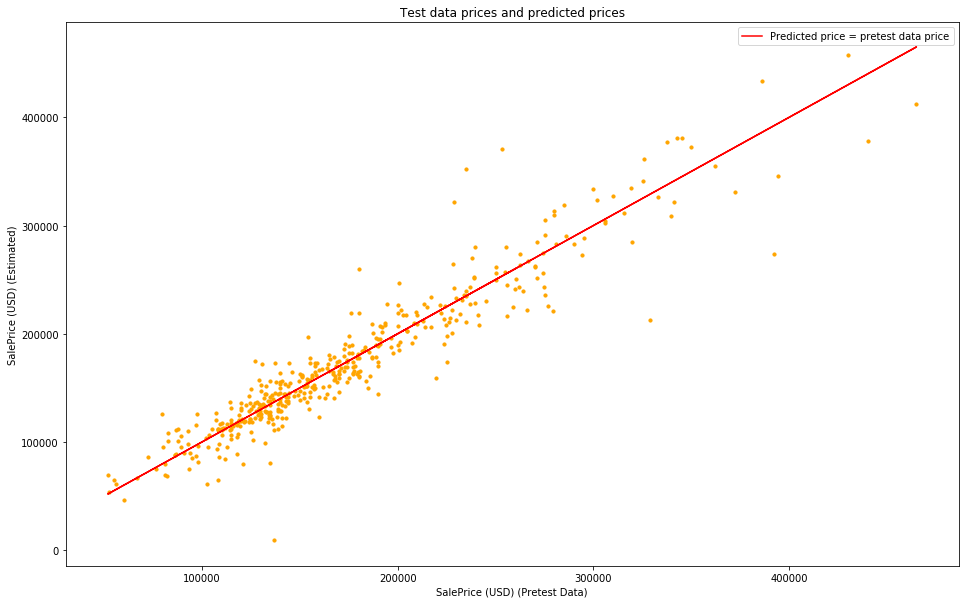

In [155]:
y_pred = pd.Series(linReg.predict(x_pretest))


figdataX = y_pretest
figdataY = 10**y_pred

plt.figure(figsize=(16,10))
plt.plot(figdataX,figdataX,color='red', label='Predicted price = pretest data price')
plt.scatter(figdataX,figdataY, s=10, c='orange')
plt.title('Test data prices and predicted prices')
plt.xlabel('SalePrice (USD) (Pretest Data)')
plt.ylabel('SalePrice (USD) (Estimated)')
plt.legend()

There is a minus value in prediction. That should be fixed. 
Changed minues value into 1, so that it is possible to use logarithm

In [156]:
y_pred = y_pred.where(y_pred>0,1)

<br><br>
Then calculate RMSE of logarithm 
<br><br>

In [157]:
from sklearn.metrics import mean_squared_error

log_y_true = np.log(figdataX)
log_y_pred = np.log(figdataY)

mse = mean_squared_error(log_y_true, log_y_pred)

rmse = np.sqrt(mse)

rmse

0.174976044362298

0.175 is about 3300/4300 in the ranking  <br>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/leaderboard

<br><br><br>
# Step 7 : Submitting the model
<hr>

### apply the model to test data set

In [144]:
x_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ExterQualM,ExterCondM,BsmtQualM,BsmtCondM,HeatingQCM,KitchenQualM,FireplaceQuM,PavedDriveM,GarageFinisheM,LotShapeM
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,3,3,3,3,3,3,0,2,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,3,3,3,3,3,4,0,2,1,1
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,3,3,4,3,4,3,3,2,3,1
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,3,3,3,3,5,4,4,2,3,1
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,4,3,4,3,5,4,0,2,2,1


In [39]:
y_pred = pd.Series(linReg.predict(x_test))
y_pred_price = 10**y_pred
y_pred_price.describe()


count      1459.000000
mean      64799.731054
std       32499.844474
min       16866.971001
25%       43462.607566
50%       58367.127114
75%       77333.993429
max      550570.447816
dtype: float64

### formatting the data file to align with the requirement (TBD)

In [40]:
submission = pd.concat([x_test['Id'],y_pred_price], axis=1)
submission.columns = ['id','SalePrice']
submission.to_csv('first_model.csv', index=None)

### submit (TBD)